L'objectif de ce TP est d'abord d'explorer le comportement de l'algorithme EM dans le cadre d'un modèle simple de mélange gaussien à $J \in \mathbb{N}^{*}$ composantes en dimension 1 :
$$
\mathcal{M}=\left\{\sum_{j=1}^{J} \pi_{j} \phi\left(\cdot ; \mu_{j}, \sigma_{j}^{2}\right):\left(\pi_{1}, \ldots, \pi_{J}\right) \in \Pi_{J}, \mu_{1}, \ldots, \mu_{J} \in \mathbb{R}, \sigma_{1}^{2}, \ldots, \sigma_{J}^{2} \in \mathbb{R}^{+*}\right\}
$$
avec $\Pi_{J}=\left\{\left(\pi_{1}, \ldots, \pi_{J}\right) \in[0,1]^{J}: \sum_{j=1}^{J} \pi_{j}=1\right\}$. C'est ensuite de s'initier au modelbased clustering en dimension supérieure avec le package Rmixmod, qui permet d'ajuster des modèles de mélange tout à fait dans l'esprit présenté en cours. N'oubliez pas d'utiliser l'aide fournie par les auteurs du package (directement depuis R, ou dans le pdf fourni sur la page Internet de Mixmod).
Certains étudiants des années précédentes préféraient travailler avec le package mclust, qui est excellent également, et qui permet de mettre en œuvre une approche model-based clustering tout à fait proche de celle présentée en cours (avec des nuances concernant les modèles de mélange utilisés : attention à cela si vous utilisez ce package). Je n'y vois aucun inconvénient.
Outre les questions posées, n'hésitez pas à laisser libre cours à votre curiosité.

In [128]:
library(MASS)
library(Rmixmod)
library(ggplot2)
library(cowplot)

# Modèles de mélange

**1. Tracer la densité d’une loi de mélange (trois composantes par exemple) en dimension 1. Jouer avec les paramètres : obtenir une densité unimodale, bimodale, « oblique »...**


La fonction **modele_melange** permet de tracer la densité de plusieurs lois de mélange.\
On fixe les paramètres d'une loi grâce à une liste de vecteurs: **pi**, **mu** et **sig** représentants respectivement les proportions, les moyennes, et les variances des composantes du mélange. 

In [129]:
modele_melange<-function(theta,x){
  mg<-numeric(length(x))
  for (i in 1:length(theta$pi)){
  mg<-mg+theta$pi[i]*dnorm(x,theta$mu[i],theta$sig[i])
  }
  return (mg)
}

On peut alors définir les paramètres du mélange de cette manière :



In [130]:
theta_bimodale <- list(pi=c(1/2,1/2),mu=c(0,10),sig=c(1,1))
theta_unimodale <- list(pi=c(3/4,1/4),mu=c(0,1),sig=c(1,1))
theta_oblique <- list(pi=c(1/4,3/4),mu=c(0,5),sig=c(1,5))
theta <- list(pi=c(1/3,1/6,1/2), mu=c(0,5,10), sig=c(1,1,4))

Et tracer les densités correspondantes :

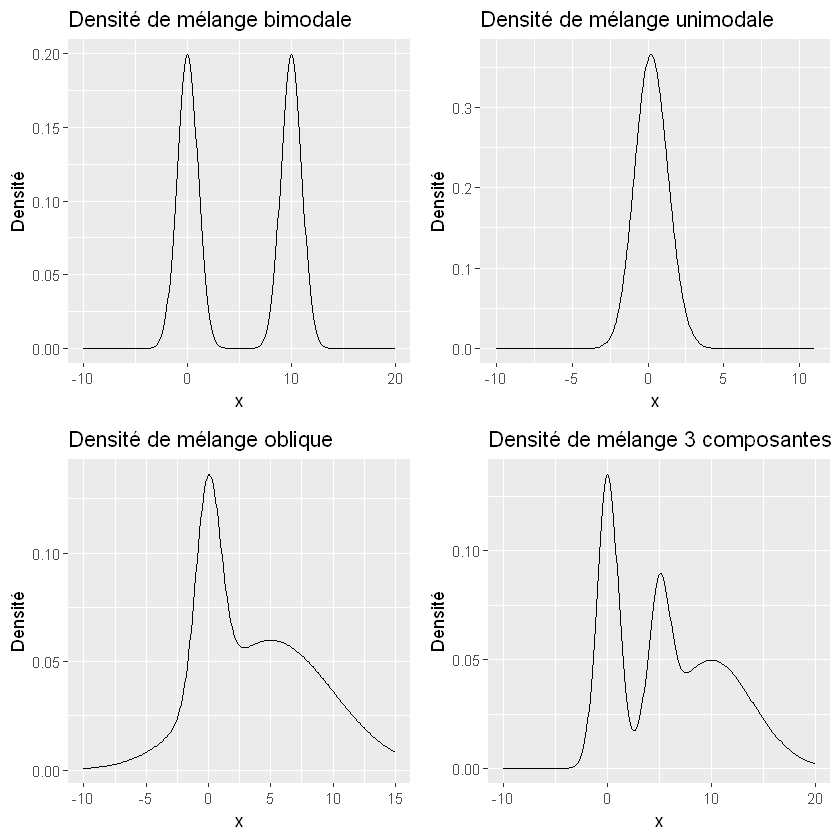

In [134]:
x4 <- seq(min(theta_bimodale$mu)-10,max(theta_bimodale$mu)+10,0.1)
mod_bi <- modele_melange(theta_bimodale,x4)
plot_1 <- ggplot()+geom_line(aes(x=x4,y=mod_bi),col='black')+labs(title="Densité de mélange bimodale",y='Densité',x='x')

x3 <- seq(min(theta_unimodale$mu)-10,max(theta_unimodale$mu)+10,0.1)
mod_uni <- modele_melange(theta_unimodale,x3)
plot_2 <- ggplot()+geom_line(aes(x=x3,y=mod_uni),col='black')+labs(title="Densité de mélange unimodale",y='Densité',x='x')

x1 <- seq(min(theta_oblique$mu)-10,max(theta_oblique$mu)+10,0.1)
mod_ob <- modele_melange(theta_oblique,x1)
plot_3 <- ggplot()+geom_line(aes(x=x1,y=mod_ob),col='black')+labs(title="Densité de mélange oblique",y='Densité',x='x')

x2 <- seq(min(theta$mu)-10,max(theta$mu)+10,0.1)
mod <- modele_melange(theta,x2)
plot_4 <- ggplot()+geom_line(aes(x=x2,y=mod),col='black')+labs(title="Densité de mélange 3 composantes",y='Densité',x='x')


cowplot::plot_grid(plot_1,plot_2,plot_3,plot_4)

Une densité gaussienne peut être vu comme un modèle de mélange :\
En effet si un seul **pi** égale à 1 et tous les autres sont égales à zéros.\
Ou encore si un **pi** égale à 0 et les deux autres **pi** sont égales à 0.5 avec des paramètres identiques.\

On remarque qu'on peut obtenir des formes de densité assez plurielles.\
D'ailleurs, on sait qu'on peut approcher au sens de la norme **L1** n'importe quelle densité continue par un modèle de mélange gaussien, ce qui exprime bien la richesse de ce type de modèle.\

On peut tracer d'autres graphes :



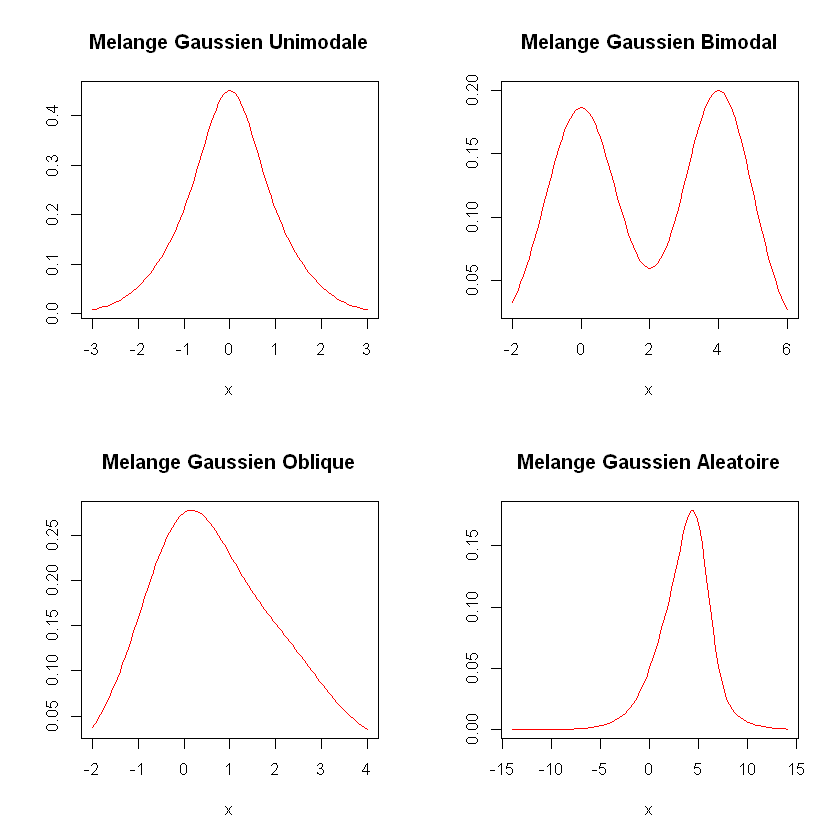

In [138]:
par(mfrow=c(2,2))

curve(0.5*dnorm(x,0,1)+0.3*dnorm(x,0,1.3)+0.2*dnorm(x,0,0.5),col="red",from=-3,to=3,ylab="")  
title("Melange Gaussien Unimodale")
curve(0.5*dnorm(x,4,1)+0.3*dnorm(x,0,1)+0.2*dnorm(x,0,1.2),col="red",from=-2,to=6,ylab="") 
title("Melange Gaussien Bimodal")
curve(0.6*dnorm(x,0,1)+0.2*dnorm(x,2,1)+0.2*dnorm(x,2,2),col="red",from=-2,to=4,ylab="") 
title("Melange Gaussien Oblique")

mean<-runif(3,0,10)
var<-runif(3,0,4)

curve(1/3*dnorm(x,mean[1],var[1])+1/3*dnorm(x,mean[2],var[2])+1/3*dnorm(x,mean[3],var[3]),col="red",from=-14,to=14,ylab="") 
title("Melange Gaussien Aleatoire")

Pour la tracer une densité unimodal, il suffit que les 3 gausiennes soient centrées au même endroit (ou presque).\
Pour la densité oblique, il faut briser le côté symetrique, propre à la densité gausienne, en attribuant des poids assez faible à une ou deux gausienne dont la moyenne est légerement décalé par rapport à une gausienne bien symetrique à qui ont attribuera la majorité du poids.

**2. Simuler des échantillons de taille 200 de la loi de densité
$$
f(\cdot ;(1 / 3,1 / 6,1 / 2,0,5,10,1,1,4))=\frac{1}{3} \phi(\cdot ; 0,1)+\frac{1}{6} \phi(\cdot ; 5,1)+\frac{1}{2} \phi(. ; 10,4)
$$
et d'autres et les représenter graphiquement.**


On programme une fonction qui simule un échantillon de taille n d'une loi de mélange gaussienne de paramètre thêta et on conserve les vraies classes dans un vecteur.

In [210]:
simul <- function(n=200,theta){
  res <- list(obs=numeric(n),group=numeric(n))
  obs <- rep(NA,n)
  group <- sample(c(1:length(theta$pi)),size=n,replace=TRUE,prob=theta$pi) 
  for (k in 1:length(theta$pi)){
    for (i in 1:n){
      if (group[i]==k){obs[i]<-rnorm(1,theta$mu[k],theta$sig[k])}
    }
  }
  res$obs <- obs
  res$group <- group
  return(res)}

On prend les mêmes thétas et on simule 200 observations pour chaque loi de mélange associée: 

In [141]:
theta_bimodale <- list(pi=c(1/2,1/2),mu=c(0,10),sig=c(1,1))
theta_unimodale <- list(pi=c(3/4,1/4),mu=c(0,1),sig=c(1,1))
theta_oblique <- list(pi=c(1/4,3/4),mu=c(0,5),sig=c(1,5))
theta <- list(pi=c(1/3,1/6,1/2), mu=c(0,5,10), sig=c(1,1,4))

Simul_bi <- simul(200,theta_bimodale)
Simul_univ <- simul(200,theta_unimodale)
Simul_ob <- simul(200,theta_oblique)
Simul <- simul(200,theta)

Et on trace les histogrammes associés: 

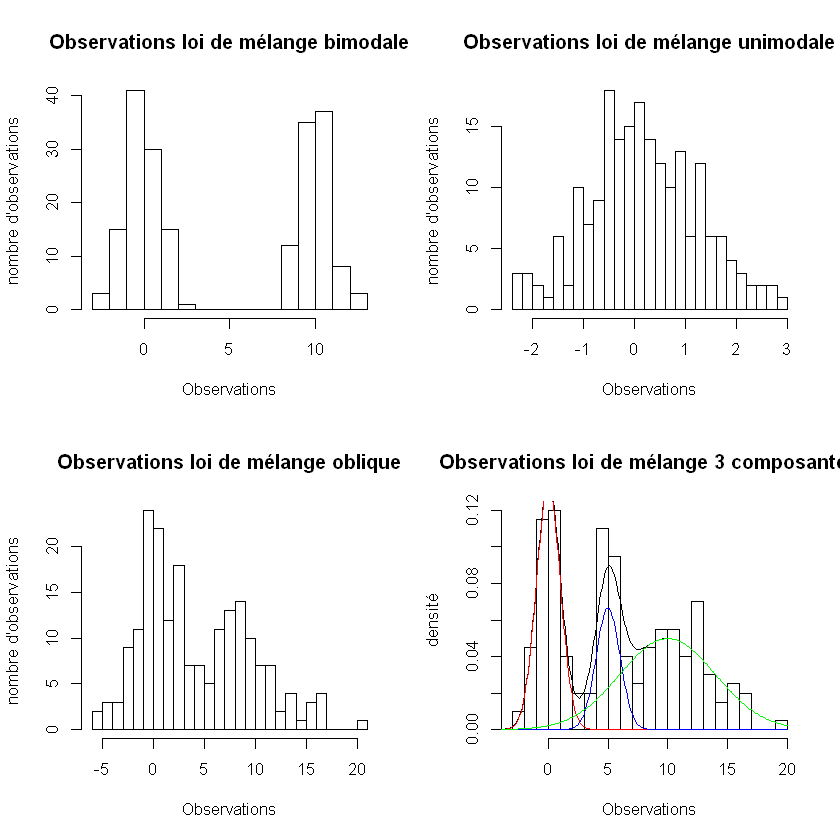

In [148]:
par(mfrow=c(2,2))

hist(Simul_bi$obs,main="Observations loi de mélange bimodale",ylab="nombre d'observations",xlab="Observations",breaks=20)

hist(Simul_univ$obs,main="Observations loi de mélange unimodale",ylab="nombre d'observations",xlab="Observations",breaks=20)

hist(Simul_ob$obs,main="Observations loi de mélange oblique",ylab="nombre d'observations",xlab="Observations",breaks=20)

hist(Simul$obs,main="Observations loi de mélange 3 composantes",ylab="densité",xlab="Observations",breaks=20,prob=TRUE)

x <- seq(min(theta$mu)-10,max(theta$mu)+10,0.1)

lines(x,modele_melange(theta,x),col='black', xlim = c(0,0.3),ylim = c(0,0.3))

lines(x,1/3*dnorm(x,0,1),col='red',xlim = c(0,0.3),ylim = c(0,0.3))

lines(x,1/6*dnorm(x,5,1),col='blue',xlim = c(0,0.3),ylim = c(0,0.3))

lines(x,1/2*dnorm(x,10,4),col='green',xlim = c(0,0.3),ylim = c(0,0.3))

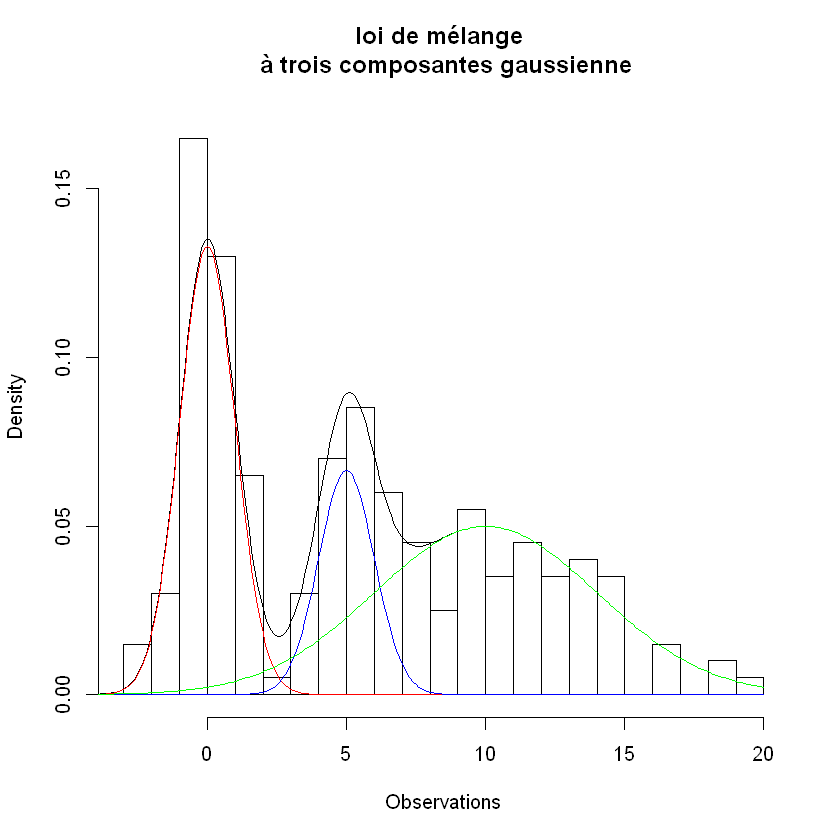

In [150]:
A <- simul(theta=theta,n=200)

hist(A$obs,breaks=20,prob=TRUE,main='loi de mélange \n à trois composantes gaussienne',xlab='Observations', ylim = c(0,0.17))
lines(x,modele_melange(theta,x),col='black', xlim = c(0,0.3),ylim = c(0,0.3))
lines(x,1/3*dnorm(x,0,1),col='red',xlim = c(0,0.3),ylim = c(0,0.3))
lines(x,1/6*dnorm(x,5,1),col='blue',xlim = c(0,0.3),ylim = c(0,0.3))
lines(x,1/2*dnorm(x,10,4),col='green',xlim = c(0,0.3),ylim = c(0,0.3))

La première seconde et troisième composantes gaussienne sont représentées respectivement par la courbe rouge, bleu et vert. La courbe noir représente la densité de mélange gaussien.\


NB: on peut aussi s'amuser à utiliser d'autres familles de lois pour créer des modèles de mélange.\

On peut faire de même avec :

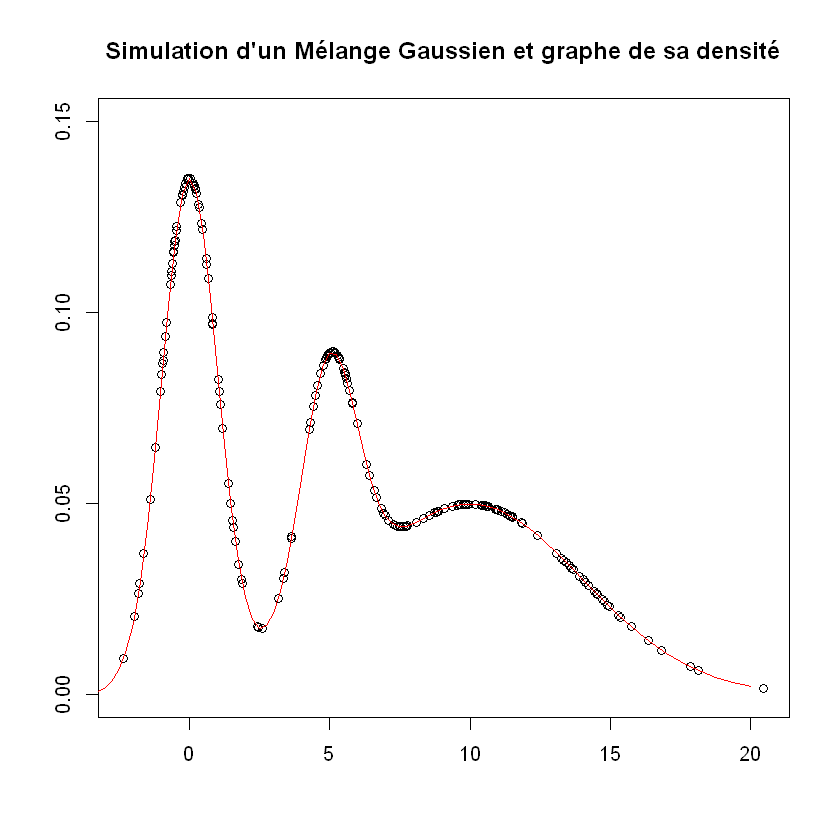

In [167]:
simula<-c()
for (i in 1:200){
  z<-runif(1,0,1)
  if(z<1/6){
    simula<-c(simula,rnorm(1,5,1))
  }
  else if(z<1/2){
    simula<-c(simula,rnorm(1,0,1))
  }
  else{
    simula<-c(simula,rnorm(1,10,4))
  }
}

plot(simula,0.5*dnorm(simula,10,4)+1/3*dnorm(simula,0,1)+1/6*dnorm(simula,5,1),ylim=c(0,0.15),ylab="",xlab="")

curve(0.5*dnorm(x,10,4)+1/3*dnorm(x,0,1)+1/6*dnorm(x,5,1),add=T,col="red",from=-5,to=20,ylab="")

title("Simulation d'un Mélange Gaussien et graphe de sa densité")

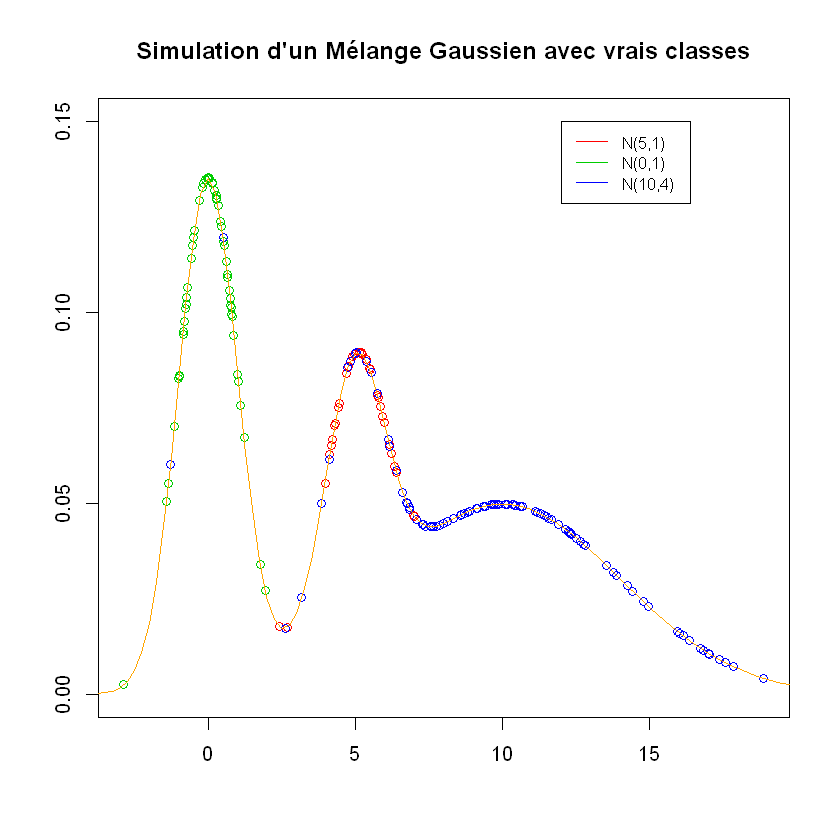

In [168]:
loi_1<-c()
loi_2<-c()
loi_3<-c()

for (i in 1:200){
  z<-runif(1,0,1)
  if(z<1/6){
    loi_1<-c(loi_1,rnorm(1,5,1))
  }
  else if(z<1/2){
    loi_2<-c(loi_2,rnorm(1,0,1))
  }
  else{
    loi_3<-c(loi_3,rnorm(1,10,4))
  }
}

col<-c(rep(2,length(loi_1)),rep(3,length(loi_2)),rep(4,length(loi_3)))

plot(c(loi_1,loi_2,loi_3),0.5*dnorm(c(loi_1,loi_2,loi_3),10,4)+1/3*dnorm(c(loi_1,loi_2,loi_3),0,1)+1/6*dnorm(c(loi_1,loi_2,loi_3),5,1),ylim=c(0,0.15),col=col,ylab = "",xlab="")

curve(0.5*dnorm(x,10,4)+1/3*dnorm(x,0,1)+1/6*dnorm(x,5,1),add=T,col="orange",from=-5,to=20)

title("Simulation d'un Mélange Gaussien avec vrais classes")

legend(12,0.15,legend=c("N(5,1)","N(0,1)","N(10,4)"),col=c(2,3,4),lty=1,cex=0.8)


On remarque que la plupart des observations sont regroupées autour des moyennes respectives des différents compisantes du mélange. On remarque aussi que certains observations de $N(10,4)$ se mélangent aux autres observations de $N(5,1)$ et $N(0,1)$, ce qui est logique concernant la variance de cette dernière.

On peut conclure que le résultat est convaincant.

On crée une fonction qui permet de simuler une échantillon de taille n d’une loi de mélange uniforme à deux composantes.

In [169]:
theta_unif <-list(pi= c(3/4,1/4) ,min = c(0,4), max = c(4,8))

y<-seq(min(theta_unif$min)-10,max(theta_unif$min)+10,0.1)

modele_melange_unif<-function(theta,y){
  mg<-numeric(length(y))
  for (i in 1:length(theta$pi)){
    mg<-mg+theta$pi[i]*dunif(y,theta$min[i],theta$max[i])
  }
  return (mg)
}


simul_unif<-function(n=200,theta){
  res<-list(obs=numeric(n),group=numeric(n))
  obs<-rep(NA,n)
  group<-sample(c(1:length(theta$pi)),size=n,replace=TRUE,prob=theta$pi) 
  for (k in 1:length(theta$pi)){
    for (i in 1:n){
      if (group[i]==k){obs[i]<-runif(1,theta$min[k],theta$max[k])}
    }
  }
  res$obs<-obs
  res$group<-group
  return(res)}

theta_unif <- list(pi= c(3/4,1/4) ,min = c(0,4), max = c(4,8))

B <- simul_unif(n=200,theta=theta_unif)

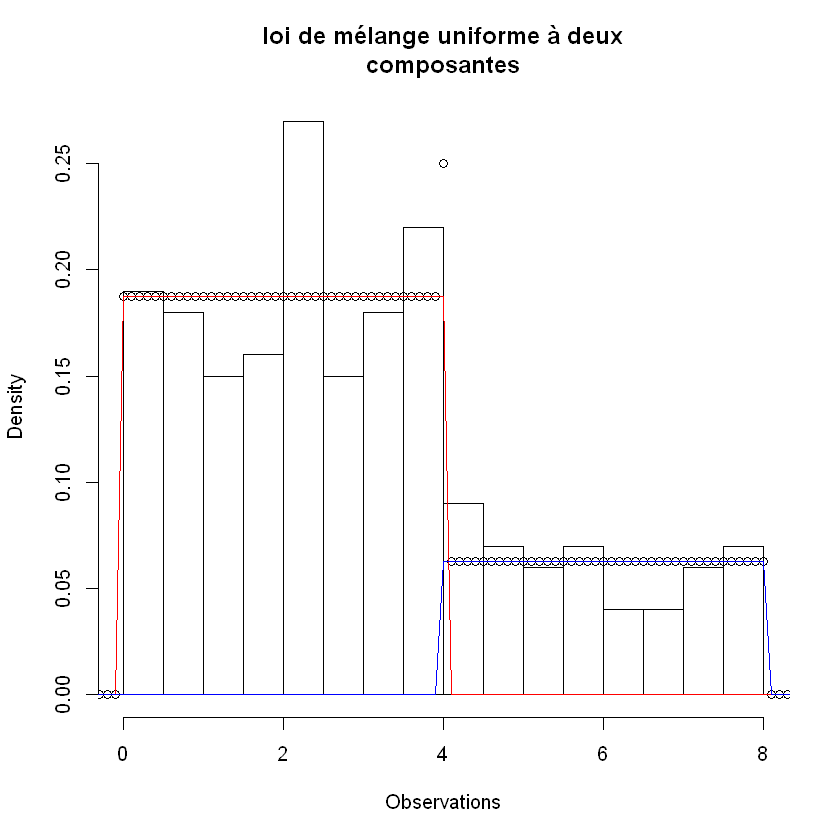

In [156]:
hist(B$obs,breaks=20,prob=TRUE,main='loi de mélange uniforme à deux\n composantes ',xlab='Observations')
mm <- modele_melange_unif(theta_unif,y)
points(y,mm,col='black', xlim = c(0,0.3),ylim = c(0,0.3))
lines(y,3/4*dunif(y,0,4),col='red',xlim = c(0,0.3),ylim = c(0,0.3))
lines(y,1/4*dunif(y,4,8),col='blue',xlim = c(0,0.3),ylim = c(0,0.3))

La première composante (en rouge) est une loi uniforme continue de paramètre (0,4) et la deuxième composante (en bleu) est une loi uniforme continue de paramètre (4,8).
La loi de mélange est représentée par les points noirs sur le graphique.

**3. Exécuter ces simulations de façon à conserver la « vraie » composante de simulation de chaque observation (les $z_{i}$ ). Représenter les observations avec leur composante sur un même graphique. Utiliser par exemple des couleurs.**

**et**

**4. Comparer les « vraies » classes et celles obtenues par la règle du MAP calculée avec les vrais paramètres du mélange.**


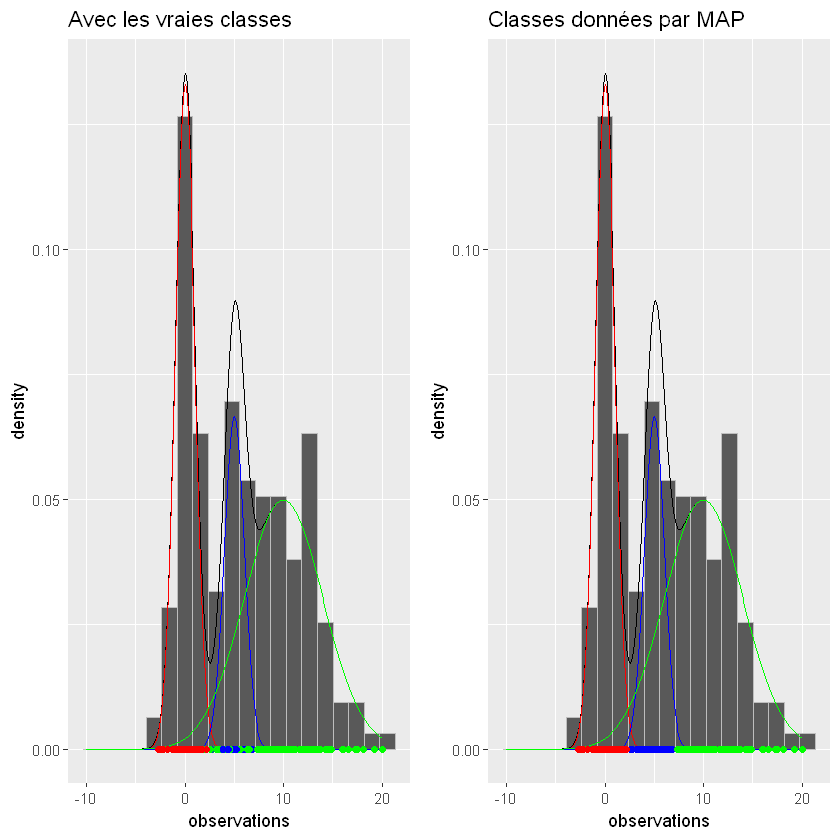

In [170]:
A <- simul(theta=theta,n=200)

v <- ggplot()+geom_histogram(aes(x=A$obs,y=..density..),col='grey',bins=20)+geom_line(aes(x=x,y=modele_melange(theta,x)),col='black')+geom_line(aes(x=x,y=1/3*dnorm(x,0,1)),col='red')+geom_line(aes(x=x,y=1/6*dnorm(x,5,1)),col='blue')+geom_line(aes(x=x,y=1/2*dnorm(x,10,4)),col='green')+geom_point(aes(x=A$obs,y=rep(0,200)),col=c('red','blue','green')[A$group])+labs(title='Avec les vraies classes',x='observations')

MAP <- function(obs,theta){
  groupe<-numeric(length(obs))
  for(j in 1:length(obs)){
    m<-c(dnorm(obs[j],theta$mu[1],theta$sig[1]),dnorm(obs[j],theta$mu[2],theta$sig[2]),dnorm(obs[j],theta$mu[3],theta$sig[3]))
    groupe[j]<-which.max(m)
  }
  return(groupe)
}

w <- ggplot()+geom_histogram(aes(x=A$obs,y=..density..),col='grey',bins=20)+geom_line(aes(x=x,y=modele_melange(theta,x)),col='black')+geom_line(aes(x=x,y=1/3*dnorm(x,0,1)),col='red')+geom_line(aes(x=x,y=1/6*dnorm(x,5,1)),col='blue')+geom_line(aes(x=x,y=1/2*dnorm(x,10,4)),col='green')+geom_point(aes(x=A$obs,y=rep(0,200)),col=c('red','blue','green')[MAP(A$obs,theta=theta)])+labs(title='Classes données par MAP',x='observations')

plot_grid(v,w)

* On observe que la règle du MAP sépare les classes de manière tranchée, de manière "théorique" en prenant le max des probabilités que l'observation appartienne à chaque composante. La méthode du MAP, crée 3 groupes homogènes et totalement distincts les uns des autres.


* Les "vraies" classes, quant à elle, donnent une distribution plus aléatoire. Les groupes se mêlent, notamment le groupe bleu et vert puisque leurs composantes respectives se "marchent dessus".


* Une remarque qui nous semble importante est qu'il n'y a pas de bonne ou de mauvaise classification. Le MAP reste un moyen adapté de réaliser des classes. On pourrait également penser à classer les observations "ambiguës" de manière aléatoire pour coller un peu plus aux "vraies" classes. On pourrait même créer une nouvelle classe pour rassembler ces éléments intermédiaires. Tout dépend de l'objectif pratique qu'il y a derrière le clustering que l'on réalise.


* Par exemple, dans le domaine marketing: on pourrait imaginer avoir à identifier 3 groupes de clients pour réaliser une stratégie marketing adéquate à chaque groupe identifié : la règle du MAP semble appropriée. Par ailleurs, on peut se permettre une légère marche d'erreur dans ce type de domaine parce que l'objectif ne va pas avoir des conséquences désastreuses comme dans le cas de l'aviation et de l'étude de crashs.


**Maximun a Posteriori :**

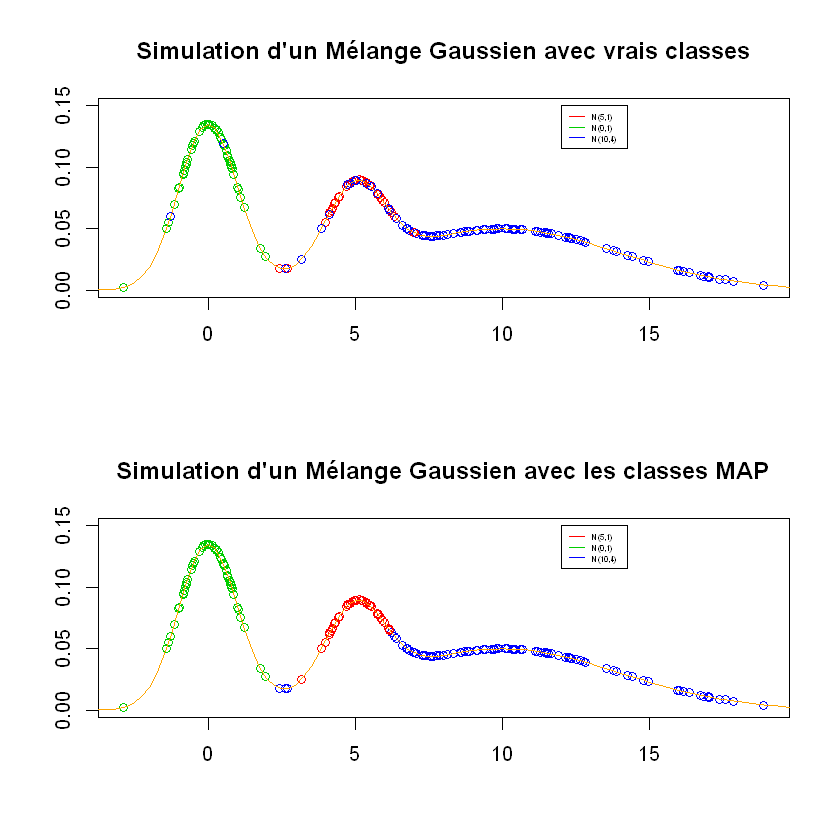

In [172]:
MAP2 <- function(simula){
  f1<-1/6*dnorm(simula,5,1)/(1/6*dnorm(simula,5,1)+0.5*dnorm(simula,10,4)+1/3*dnorm(simula,0,1))
  f2<-1/3*dnorm(simula,0,1)/(1/6*dnorm(simula,5,1)+0.5*dnorm(simula,10,4)+1/3*dnorm(simula,0,1))
  f3<-0.5*dnorm(simula,10,4)/(1/6*dnorm(simula,5,1)+0.5*dnorm(simula,10,4)+1/3*dnorm(simula,0,1))
  
  if(f1>f2 && f1>f3){
    return (2)
  }
  else if(f2>f1 && f2>f3){
    return(3)
  }
  else{
    return(4)
  }
}
color_MAP<-as.numeric(Map(MAP2,c(loi_1,loi_2,loi_3)))


par(mfrow=c(2,1))
plot(c(loi_1,loi_2,loi_3),0.5*dnorm(c(loi_1,loi_2,loi_3),10,4)+1/3*dnorm(c(loi_1,loi_2,loi_3),0,1)+1/6*dnorm(c(loi_1,loi_2,loi_3),5,1),ylim=c(0,0.15),col=col,ylab = "",xlab="")
curve(0.5*dnorm(x,10,4)+1/3*dnorm(x,0,1)+1/6*dnorm(x,5,1),add=T,col="orange",from=-5,to=20)
title("Simulation d'un Mélange Gaussien avec vrais classes")
legend(12,0.15,legend=c("N(5,1)","N(0,1)","N(10,4)"),col=c(2,3,4),lty=1, cex=0.4)


plot(c(loi_1,loi_2,loi_3),0.5*dnorm(c(loi_1,loi_2,loi_3),10,4)+1/3*dnorm(c(loi_1,loi_2,loi_3),0,1)+1/6*dnorm(c(loi_1,loi_2,loi_3),5,1),ylim=c(0,0.15),col=color_MAP,ylab = "",xlab="")
curve(0.5*dnorm(x,10,4)+1/3*dnorm(x,0,1)+1/6*dnorm(x,5,1),add=T,col="orange",from=-5,to=20)
title("Simulation d'un Mélange Gaussien avec les classes MAP")
legend(12,0.15,legend=c("N(5,1)","N(0,1)","N(10,4)"),col=c(2,3,4),lty=1, cex=0.4)


**5. Représenter la vraisemblance. L'objectif est notamment d'observer les maxima locaux. Pour cela, fixer par exemple tous les paramètres à leur vraie valeur, sauf deux. Interpréter certains de ce ces maxima.**


Comme le maximun de vraisemblance, la méthode du maximum a posteriori consiste à maximer la vraisemblance, mais cette fois en prenant en compte la loi à priori des paramètres du modèle. En d'autre termes,  $$ MAP=arg\max_{\boldsymbol{\theta}}  {\displaystyle L(\theta )p(\theta )}$$
avec $$ {\displaystyle p(\theta)\,  et \,  L(\theta) }$$ 

respectivement la distribution a priori des paramètres et la vraisemblance du modèle.

On remarque que les données simulées par le MAP sont séparés de manière beaucoup plus stricte que les vraies données, la maximisation à posteriori favorise très fortement les évenements probable et de ce fait modélise mal les évements rares, issue de l'aléa présent dans le monde dans lequel nous vivons. 

Faisons varier deux des paramètres de la loi de mélange de la question 2.

In [173]:
lvraisnorm <- function(theta, obs){    
  logvrais <- sum(log(modele_melange(theta=theta, x=obs)))
  return(logvrais)
}

obs<-simul(1000,theta=theta)$obs
mu1<-seq(-2,2,by=0.1)
mu2<-seq(3,7,by=0.1)
L<-matrix(NA,nrow=length(mu1),ncol=length(mu2))
for (k in 1:length(mu1)){
  for (l in 1:length(mu2)) {
    theta$mu<-c(mu1[k],mu2[l],theta$mu[3])
    L[k,l]<-lvraisnorm(theta=theta,obs = obs)
  }
}

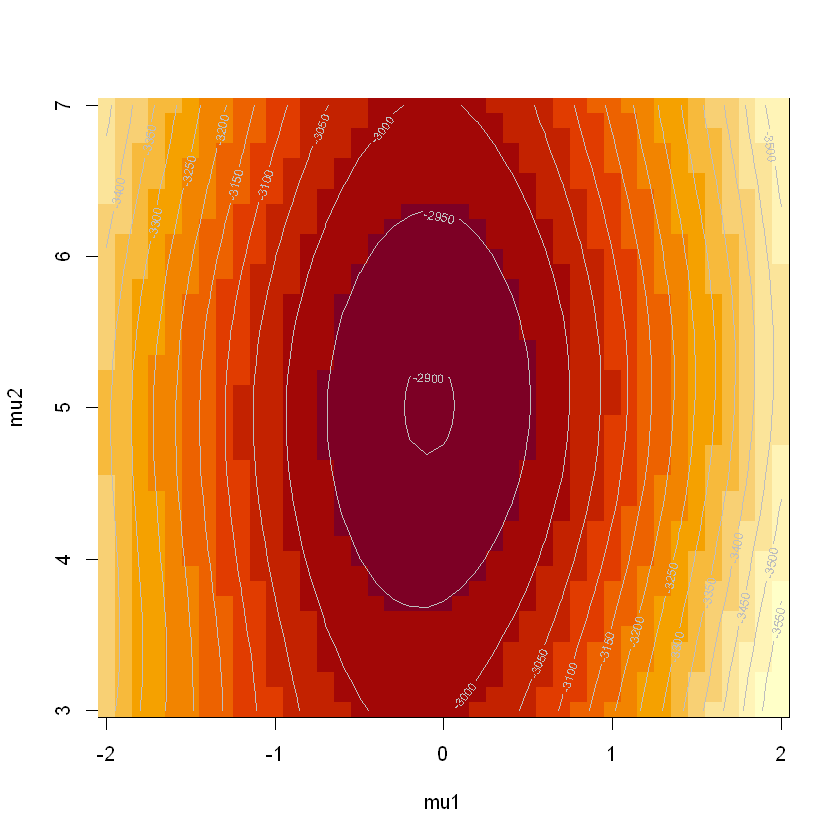

In [174]:
image(mu1,mu2,L)
contour(mu1,mu2,L,add=TRUE,nlevels=20,col='grey')

* On observe que les paramètres qui maximisent la log-vraisemblance sont les paramètres avec lesquels on a simulés nos observations, ce qui semble somme toute logique. 

* Pour la visualisation 3D:

In [ ]:
vrai<-function(obs,x,y){
  dens <-0
  for (k in 1:length(obs)){
    dens <- dens+log(( 0.5*dnorm(obs[k],10,4)+1/3*dnorm(obs[k],0,1)+1/6*dnorm(obs[k],x,y)))
  }                                         
  return(dens)
}

# On voit bien le maximum ici 
g <- expand.grid(x = seq(0,15,0.1), y = seq(1,8,0.1))

z<-vrai(simula,g$x,g$y)

plot3d(x=g$x,y=g$y,z=z,col = "blue",alpha=0.5,type = "l",xlab = "mu",ylab = "sigma",zlab = "vrai",
       main=paste0("Vraisemblance du modele de melange en fonction de deux parametres"))

max_vrai<-which (z==max(z))

points3d(g[max_vrai,1],g[max_vrai,2],z[max_vrai],c="red")

**6. On s’intéresse dans cette question à la situation en dimension 2. Choisir un mélange de deux composantes bien séparées dans le modèle $[p\_L_k\_B_k]$. Notons p la proportion d’une des deux composantes au choix et $\lambda A$ la décomposition
de sa matrice de covariances**


Le modele $[p\_L_k\_B_k]$ est un modèle qui fait partie de la famille diagonale, c'est à dire dont les matrices de variances sont supposées diagonales. De plus, le volume et la forme des groupes sont possiblement variables dans ce modèle précisément, là où d'autres imposent des formes sphériques par exemple. Toutefois, il faut que les proportions soient égales. Il y a donc des hypothèses qui sont faites sur la manière dont les groupes sont répartis. Ici, on choisit un paramètre de la forme: 

In [183]:
theta <- list(pi=c(1/2,1/2),mu=c(0,15),sig=c(2,2))

NB: on aurait pu mettre des sigmas différents, le modèle nous le permettait. 

**(a) Représenter une isodensité ainsi qu’un échantillon de taille 1000 de cette loi.**


On représente une isodensité ainsi qu’un échantillon de taille 1000 de cette loi.

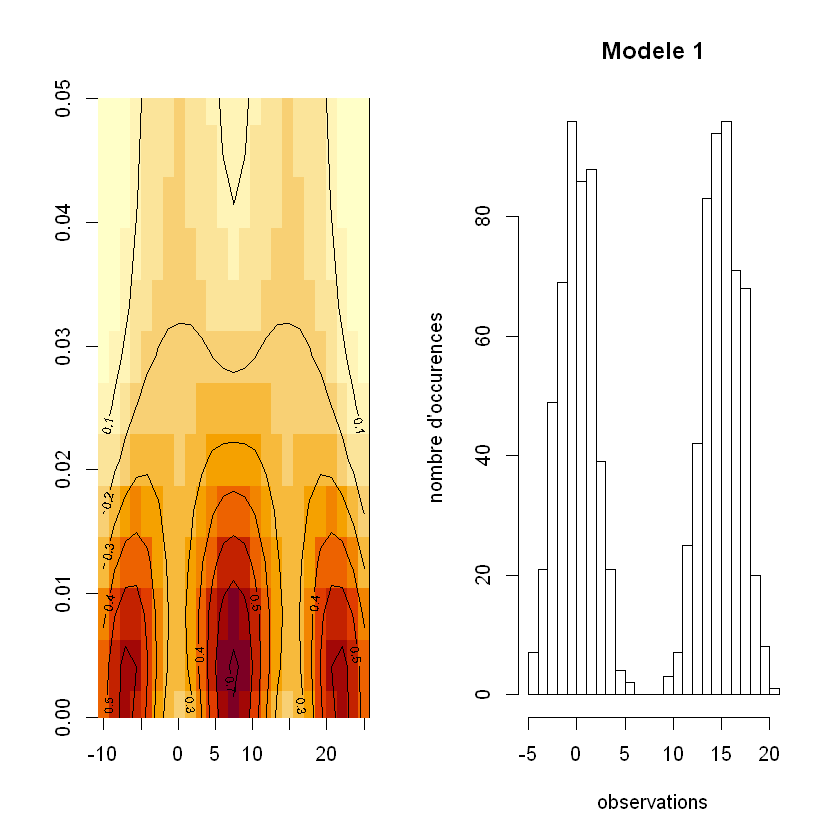

In [186]:
x <- seq(min(theta$mu)-10,max(theta$mu)+10,0.1)
mod <- modele_melange(theta,x)
kd <- kde2d(x,mod)

par(mfrow=c(1,2))

image(kd,ylim=c(0,0.05))
contour(kd,add=TRUE)

observ1 <- simul(1000,theta)$obs
hist(observ1,xlab='observations',ylab="nombre d'occurences",main="Modele 1",breaks=20)

Nous avons ici deux maximas distincts assez étirés, ce qui semble assez logique puisque nous avons deux composantes assez éloignées avec des proportions égales.

**(b) Doubler $\lambda$ et représenter une isodensité ainsi qu’un échantillon de taille 1000 de la loi obtenue.**

On double ensuite la variance et on représente une isodensité ainsi qu’un échantillon de taille 1000 de la loi obtenue.

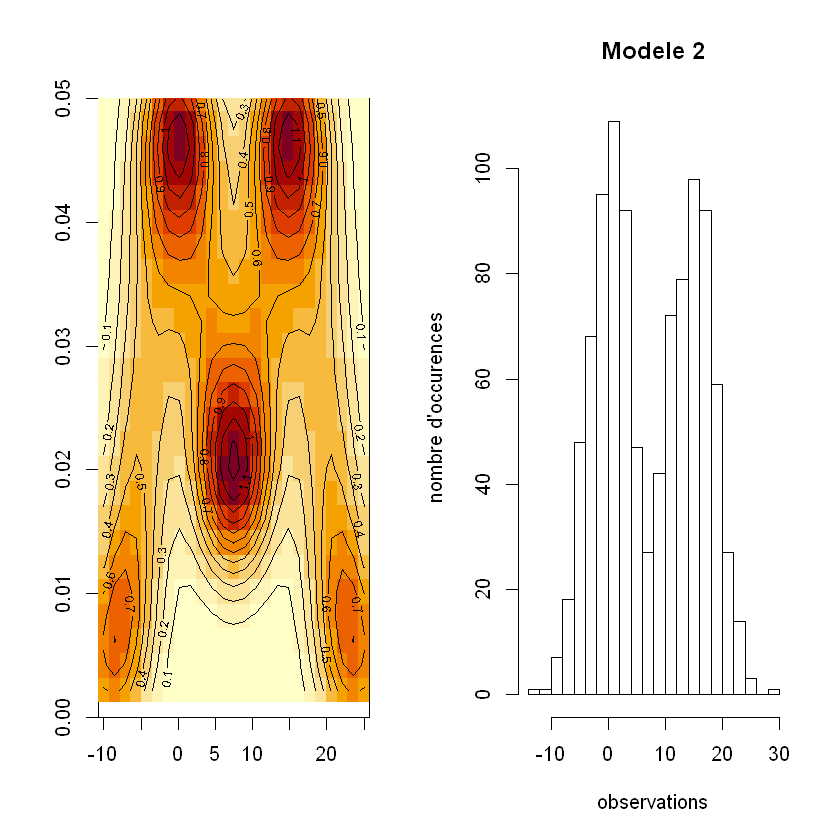

In [187]:
theta <- list(pi=c(1/2,1/2),mu=c(0,15),sig=c(4,4))
x <- seq(min(theta$mu)-10,max(theta$mu)+10,0.1)
mod <- modele_melange(theta,x)
kd <- kde2d(x,mod)

par(mfrow=c(1,2))

image(kd,ylim=c(0,0.05))
contour(kd,add=TRUE)

observ1 <- simul(1000,theta)$obs
hist(observ1,xlab='observations',ylab="nombre d'occurences",main="Modele 2",breaks=20)

On constate que lorsque la variance augmente, on "redistribue" un peu plus les données sur l'intervalle des valeurs possibles. Les conséquences sont l'ajout de maximas locaux et des maximas moins étirés, plus localisés.  

**(c) À nouveau avec la valeur d’origine de $\lambda$, remplacer la proportion p par p/2 et représenter une isodensité ainsi qu’un échantillon de taille 1000 de la loi obtenue.**


Enfin, on laisse la variance inchangée et on remplace la proportion p par $\frac{p}{2}$.

On représente une isodensité ainsi qu’un échantillon de taille 1000 de la loi obtenue.

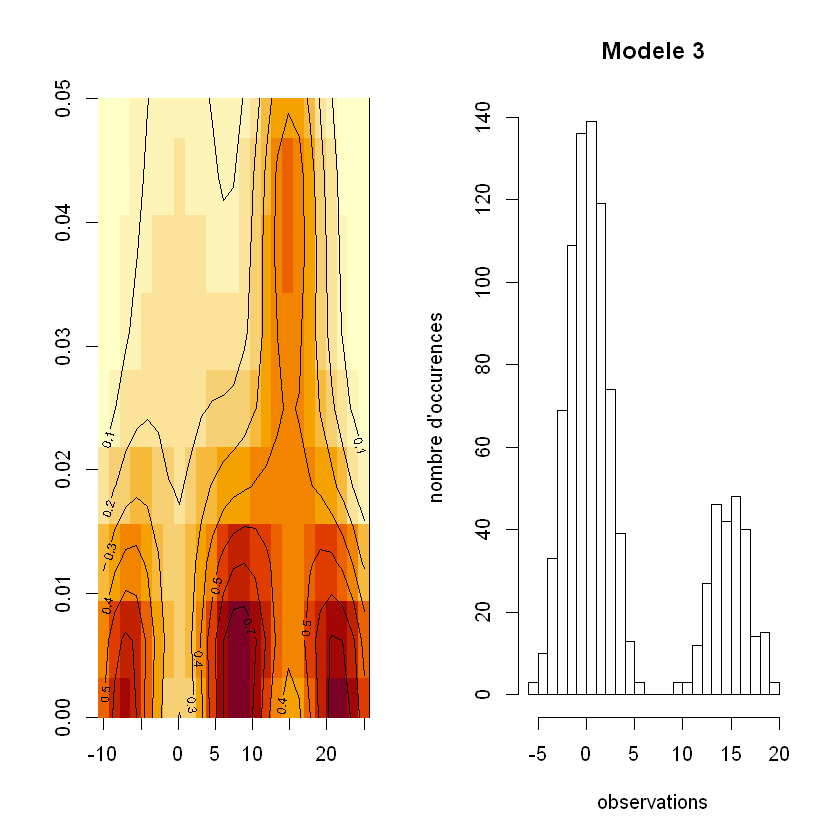

In [188]:
theta <- list(pi=c(3/4,1/4),mu=c(0,15),sig=c(2,2))
x <- seq(min(theta$mu)-10,max(theta$mu)+10,0.1)
mod <- modele_melange(theta,x)
kd <- kde2d(x,mod)

par(mfrow=c(1,2))

image(kd,ylim=c(0,0.05))
contour(kd,add=TRUE)

observ1 <- simul(1000,theta)$obs
hist(observ1,xlab='observations',ylab="nombre d'occurences",main="Modele 3",breaks=20)

Lorsque les proportions changent en faveur d'une composante, on observe que les maximas se concentrent en un endroit précis.

## Algorithme EM, dimension 1


**1. Implémentation de l’algorithme EM (en dimension 1).\
(a) Comment s’écrit l’algorithme EM dans ce cadre ? Faire (avec un papier et un crayon) les calculs nécessaires pour toutes les étapes.**


Dans le cas des modèles à variables latente,  la maximisation  de  la log-vraisemblance "observée" définit par :
$$ L(\mathbf{x};\boldsymbol{\theta})=\sum_{i=1}^n\log f(\boldsymbol{x}_i,\boldsymbol{\theta})$$
avec $$ f(x_i,θ) $$ 

la loi ayant générée notre échantillon peut s'avérer très complexe, c'est la qu'intervient l'algorithme EM

**(b) Coder l’algorithme EM obtenu sous forme d’une fonction qui prend en entrées les données sous forme d’un data.frame ou une matrice ainsi que le nombre de composantes voulues, et produit en sortie les paramètres du mélange ajusté. Fournir une fonction qui prenne ces sorties en entrée, et qui représente graphiquement la densité du mélange ajusté ainsi que la classification des observations par MAP.**

On considère z, le vecteur des données " cachées", dont la connaissance rendrait possible la maximsation de la log-vraisemblance " complétée":
 $$ L\left((\mathbf{x,z});\boldsymbol{\theta}\right)=\sum_{i=1}^n\left(\log f(z_i|\boldsymbol{x}_i,\boldsymbol{\theta})+\log f(\boldsymbol{x}_i;\boldsymbol{\theta})\right)$$ 
 
L'objectif étant de maximiser l'esperance de cette quantité conditionnelement à des paramètres supposés.

$$ \boldsymbol{\theta}^{(c+1)}=\arg\max_{\boldsymbol{\theta}}\left(Q\left(\boldsymbol{\theta},\boldsymbol{\theta}^{(c)}\right)\right)$$

 avec $$ {\displaystyle Q\left({\boldsymbol {\theta }};{\boldsymbol {\theta }}^{(c)}\right)=\mathbb {E} \left[L\left(\mathbf {(x,z)} ;{\boldsymbol {\theta }}\right){\Bigg |}{\boldsymbol {\theta }}^{(c)}\right]} $$
 
Plus concrètement, considérons un échantillon d'observations issue d'un modèle à 2 composantes gausiennes disons A et B .On commence par supposer des paramètres du modèle ( moyenne, variance des gausiennes). Ensuite on associe aux observations la probabilité d'avoir été généré par les gausiennes A et B . Finalement, on actualise les paramètres avec des estimateurs classique comme une moyenne arithmétique mais où chaque observations est pondéré par la probabilité d'avoir été générée par la gausienne que l'on considére. On utilise les paramètres trouvés comme point de départ d'une nouvelle itération, et ainsi de suite jusqu'à l'atteinte d'un de nos critères d'arrêt. On obtient une classification non plus " hard " comme avec un Kmeans mais "soft" du fait qu'à une observation est attribué une probabilitée d'appartenir à une certaine classe et non une classe directement.

On code l’algorithme EM. Pour cela, on code une fonction update.theta qui permet de réaliser une itération de l'algorithme EM. Ainsi, la fonction algoEM consiste simplement à itérer update.theta et à conserver certains paramètres intéressants comme la log vraisemblance, le nombre d'itérations jusqu'à ce qu'on arrive à un des critères d'arrêt fixés : 

* Un nombre d'itérations limite
* Quand la log-vraisemblance n'augmente plus assez entre theta(t) et theta(t+1)

In [208]:
update.theta <- function(obs, theta){
  nb <- length(obs)
  K<-length(theta$pi)
  alpha <- matrix(NA, nrow=K, ncol=nb)
  for (j in 1:K){
    alpha[j,] <- theta$pi[j]*dnorm(obs,theta$mu[j],theta$sig[j])
  }
  p.theta <- apply(alpha, 2, 'sum')
  alpha   <- alpha/matrix(p.theta, byrow=TRUE, nrow=K, ncol=nb)
  
  pi.new  <- apply(alpha, 1, 'mean')
  mu.new  <- c(alpha%*%obs/nb/pi.new)
  mat     <- (matrix(rep(obs,each=K), nrow=K) -matrix(rep(mu.new, times=nb), nrow=K))^2
  sig.new <- sqrt(apply(alpha*mat, 1, 'mean')/pi.new)
  
  theta.new <-  list(pi =pi.new, mu=mu.new, sig=sig.new)
  return(theta.new)
}

algoEM <- function(obs, theta.init, R=200, epsilon=1e-3){   
  theta.old <- theta.init
  crit_arret <- FALSE
  log.vrais.old <- lvraisnorm(theta.init, obs)
  log<-c(log.vrais.old)
  it <- 0
  while (!crit_arret && (it < R)){ 
    theta.new <- update.theta(obs, theta.old)
    log.vrais.new <- lvraisnorm(theta.new, obs)
    crit_arret <- (abs((log.vrais.new - log.vrais.old)/log.vrais.old) < epsilon)
    log.vrais.old <- log.vrais.new
    theta.old <- theta.new
    it <- it + 1
    log<-c(log,log.vrais.old)
  }
  resultat <- list(emv = theta.new, nb.iter = it, logvraisemblance= log)
  return(resultat)
}

dessin<-function(theta,obs){
  x<-seq(min(theta$mu)-10,max(theta$mu)+10,0.1)
  mg<-numeric(length(x))
  for (i in 1:length(theta$pi)){
    mg<-mg+theta$pi[i]*dnorm(x,theta$mu[i],theta$sig[i])
  }
  groupe<-numeric(length(obs))
  for(j in 1:length(obs)){
    m<-c(dnorm(obs[j],theta$mu[1],theta$sig[1]),dnorm(obs[j],theta$mu[2],theta$sig[2]),dnorm(obs[j],theta$mu[3],theta$sig[3]))
    groupe[j]<-which.max(m)
  }
  ggplot()+geom_line(aes(x=x,y=mg))+geom_point(aes(x=obs,y=rep(0,length(obs))),col=c('red','blue','green')[groupe])+labs(title=paste0("Densite d'un melange gaussien de parametre ",as.vector(theta)),x='observations')
}

**2. Jouer avec cet EM sur des données simulées. On pourra par exemple :\
(a) Suivre l’évolution de la log-vraisemblance au cours des itérations ;**


Regardons comment évolue la log-vraisemblance sur un exemple (celui de la question 2 de la partie 1):

In [211]:
theta <- list(pi=c(1/3,1/6,1/2), mu=c(0,5,10), sig=c(1,1,4))
obs <- simul(theta = theta,n=1000)
theta_init1 <- list(pi=c(8/10,1/10,1/10),mu=c(0,5,10),sig=c(1,1,4))

mod <- algoEM(obs=obs$obs,theta_init1)

print(mod$logvraisemblance)

[1] -3388.289 -2877.028 -2873.672 -2872.013


On observe que la log-vraisemblance augmente à chaque itération (On peut voir que la log-vraisemblance est croissante).\
De plus, elle augmente de moins en moins à chaque itération jusqu'à ce qu'elle converge.

Cas particuliers: cas de croissance avec palier. Cf 2.e

**(b) Essayer de lancer l’algorithme avec plusieurs paramètres initiaux différents**

Après avoir réalisé de nombreux tests, nous donnons les exemples suivants en illustrations.

Nous initialisons theta avec les bonnes valeurs de $\mu_{k}$ et $\sigma_{k}$. Si on prend des valeurs de $\pi_{k}$ erronés: 

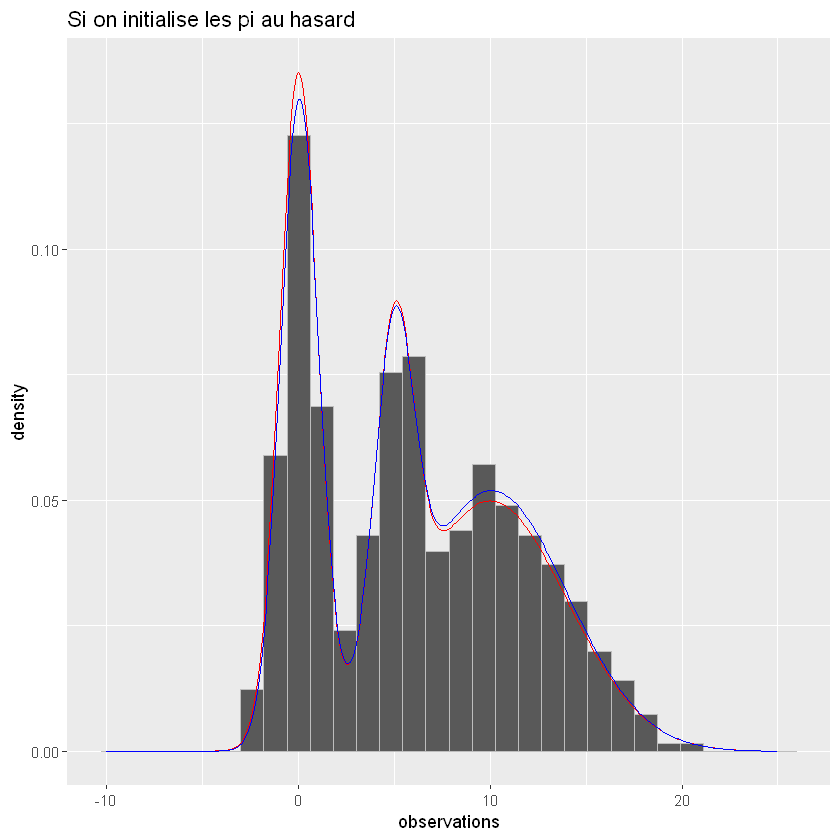

In [194]:
theta_init1<-list(pi=c(1/3,1/6,1/2), mu=c(0,5,10), sig=c(1,1,4))

obs<-simul(theta = theta,n=1000)
res1<-algoEM(obs$obs,theta_init1)

ggplot()+geom_histogram(aes(obs$obs,y=..density..),bins=30,col='grey')+geom_line(aes(x=x,y=modele_melange(x,theta=theta)),col='red')+geom_line(aes(x=x,modele_melange(res1$emv,x)),col='blue')+labs(title='Si on initialise les pi au hasard',x='observations')

On observe que si les $\mu_{k}$ et les $\sigma_{k}$ sont correctement initialisés et que les valeurs de $\pi_{k}$ sont erronées l'algorithme EM converge vers la bonne solution: l'algorithme n'est pas sensible à ces modifications et nous donne un bon paramètre.

Si on prend des valeurs des $\sigma_{k}$ erronés:

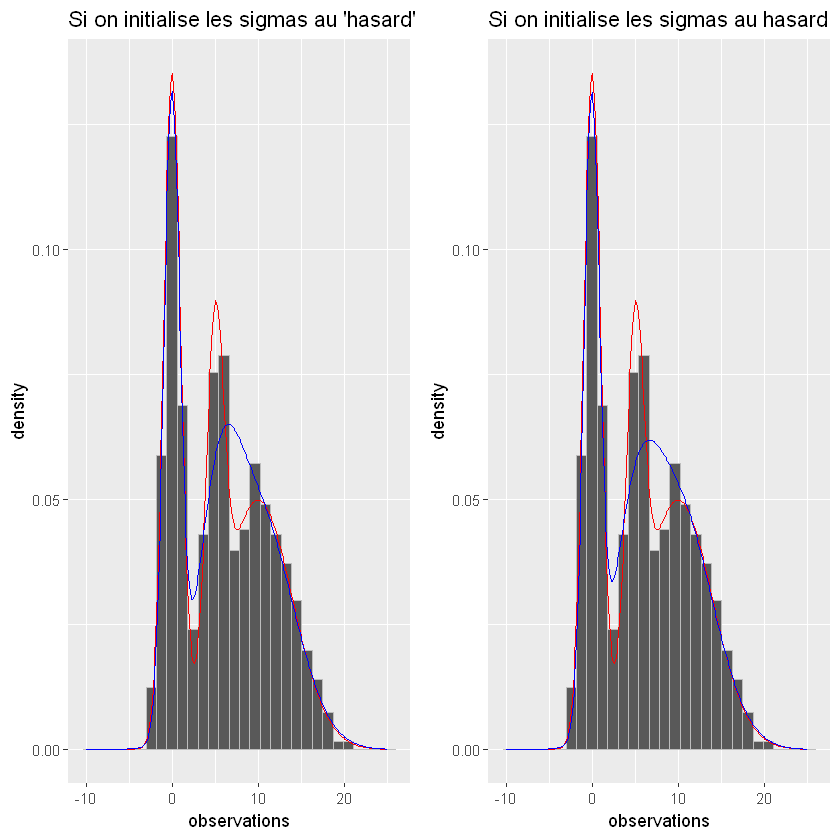

In [196]:
theta_init2<-list(pi=c(1/3,1/6,1/2),mu=c(0,5,10),sig=c(5,5,5))

res_i<-algoEM(obs$obs,theta_init2)
i<-ggplot()+geom_histogram(aes(obs$obs,y=..density..),bins=30,col='grey')+geom_line(aes(x=x,y=modele_melange(x,theta=theta)),col='red')+geom_line(aes(x=x,modele_melange(res_i$emv,x)),col='blue')+labs(title="Si on initialise les sigmas au 'hasard'",x='observations')

theta_init3<-list(pi=c(1/3,1/6,1/2),mu=c(0,5,10),sig=c(10,3,7))

res_j<-algoEM(obs$obs,theta_init3)
j<-ggplot()+geom_histogram(aes(obs$obs,y=..density..),bins=30,col='grey')+geom_line(aes(x=x,y=modele_melange(x,theta=theta)),col='red')+geom_line(aes(x=x,modele_melange(res_j$emv,x)),col='blue')+labs(title='Si on initialise les sigmas au hasard',x='observations')

plot_grid(i,j)



On observe que si les $\mu_{k}$ et les $\pi_{k}$ sont correctement initialisés et que les valeurs $\sigma_{k}$ sont erronées, l'algoritme EM ne donne pas de très bonnes solutions mais ce n'est pas catastrophique. D'ailleurs, cela marche assez bien pour theta_init2 mais ce n'est pas complètement au hasard qu'ils ont été choisis (proches de la variance empirique des données).



Si on prend des valeurs de $\mu_{k}$ erronés:

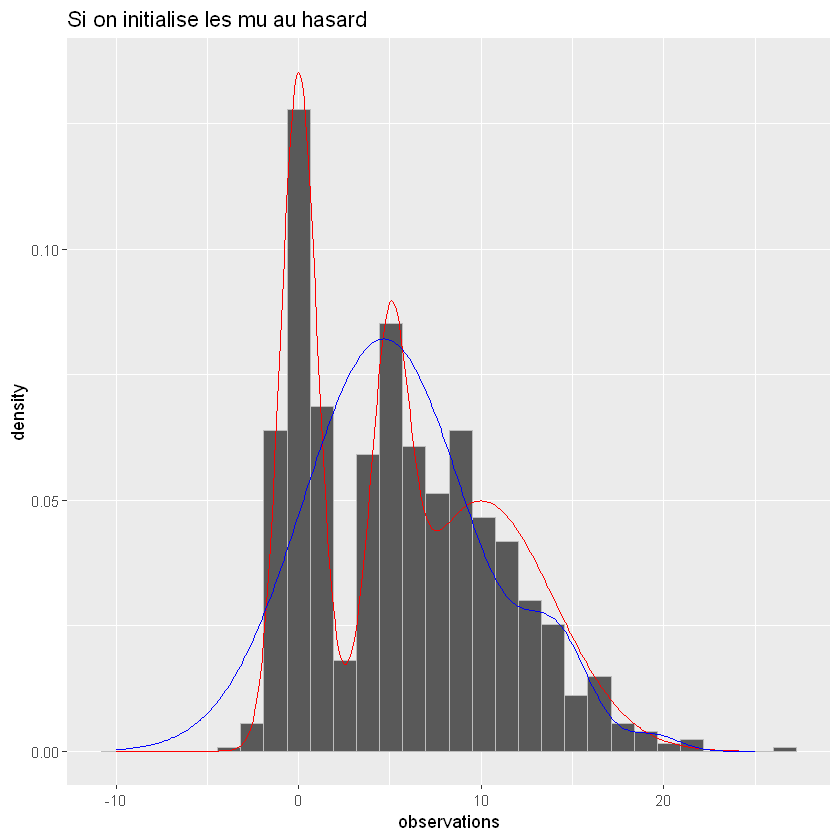

In [212]:
theta_init4<-list(pi=c(1/3,1/6,1/2),mu=c(15,20,5),sig=c(1,1,4))

res_<-algoEM(obs$obs,theta_init4)

ggplot()+geom_histogram(aes(obs$obs,y=..density..),bins=30,col='grey')+geom_line(aes(x=x,y=modele_melange(x,theta=theta)),col='red')+geom_line(aes(x=x,modele_melange(res_$emv,x)),col='blue')+labs(title='Si on initialise les mu au hasard',x='observations')

On observe que si les $\sigma_{k}$ et les $\pi_{k}$  sont correctement initialisés et que les valeurs de $\mu_{k}$ sont erronées, l'algorithme EM ne semble pas converger systématiquement vers la bonne solution, voire il semble converger vers de très mauvaises solutions.


* Méthode possible :

Faire plusieurs initialisations de l'algorithme EM avec la stratégie d'initialisation suivante: des $\mu_{k}$ piochés aléatoirement dans les observations, faire une initialisation assez cohérente des $\sigma_{k}$ , par exemple aléatoirement autour de la variance empirique des données (sur un intervalle +-5) et des $\pi_{k}$ "neutres" ie proportionnels et utiliser la paramètre qui admet la plus grande log-vraisemblance par rapport aux données.

On simule alors nos données et on effectue l'algorithme sur 200 initialisations avec 5 itérations maximum (soucis de temps d'exécution). On choisit le paramètre qui nous donne la plus grande vraisemblance (le plus prometteur) et on continue l'exécution de l'algorithme EM uniquement sur ce dernier. 

On obtient le paramètre suivant: 

$pi
[1] 0.1499687 0.5389393 0.3110919

$mu
[1]  5.04830922  9.92220350 -0.03467097

$sig
[1] 0.795345 4.106384 1.085138

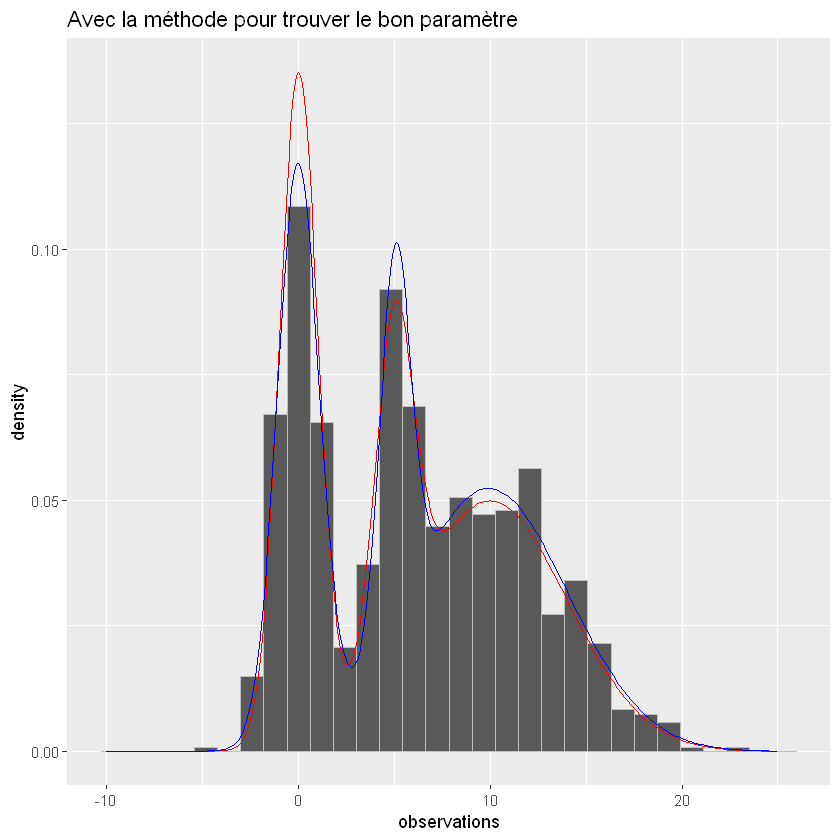

In [213]:
obs<-simul(theta = theta,n=1000)
Theta_res<-matrix(NA,ncol=9,nrow=200)
log<-numeric(200)
for (i in 1:200){
mu<-sample(obs$obs,size=3,replace=FALSE)
sig<-runif(3,0,10)
pi<-c(1/3,1/3,1/3)
theta_init4<-list(pi=pi,mu=mu,sig=sig)
res4<-algoEM(obs$obs,theta_init4,R=5)
Theta_res[i,]<-c(res4$emv$pi,mu=res4$emv$mu,sig=res4$emv$sig)
log[i]<-res4$logvraisemblance[res4$nb.iter+1]
}

j<-which.max(log)
theta_EM<-Theta_res[j,]
theta_EM<-list(pi=theta_EM[1:3],mu=theta_EM[4:6],sig=theta_EM[7:9])
theta_EM<-algoEM(theta.init=theta_EM,obs=obs$obs)$emv

theta_EM
ggplot()+geom_histogram(aes(obs$obs,y=..density..),bins=30,col='grey')+geom_line(aes(x=x,y=modele_melange(x,theta=theta)),col='red')+geom_line(aes(x=x,modele_melange(theta_EM,x)),col='blue')+labs(title='Avec la méthode pour trouver le bon paramètre',x='observations')


**(c) Représenter la densité ajustée**

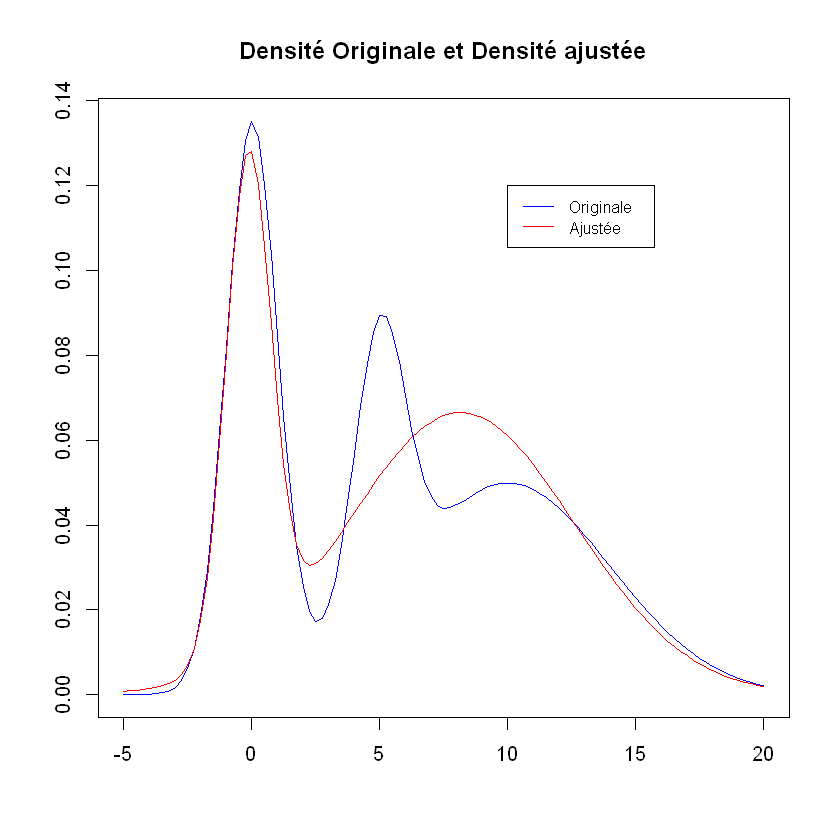

In [204]:
lvraisnorm <- function(param, obs){ 
  dens <- rep(0, length(obs))
  K <- length(param$pi)
  for (k in 1:K){
    dens <- dens + param$pi[k]*dnorm(obs,param$mu[k], param$sig[k])
  }                                         
  return(sum(log(dens)))
}

update_param<-function(obs,param){
  nb <- length(obs) 
  K  <- length(param$mu) 
  
  alpha <- matrix(NA, nrow=K, ncol=nb)
  for (j in 1:K){
    alpha[j,] <- param$pi[j]*dnorm(obs,param$mu[j],param$sig[j])
  }
  cx <- apply(alpha, 2, 'sum')
  alpha <- alpha/matrix(cx, byrow=TRUE, nrow=K, ncol=nb)
  

  pi_new  <- apply(alpha, 1, 'mean')
  mu_new  <- c(alpha%*%obs/nb/pi_new)
  mat     <- (matrix(rep(obs,each=K), nrow=K) -matrix(rep(mu_new, times=nb), nrow=K))^2
  sig_new <- sqrt(apply(alpha*mat, 1, 'mean')/pi_new)
  
  param_new <-  list(pi =pi_new, mu=mu_new, sig=sig_new)
  return(param_new)
}

algoEM <- function(obs,param,iterMax=200,epsilon=1e-5){   
  crit_arret<- FALSE
  param_old<-param
  param_new<-param
  logvrais_old<-lvraisnorm(param,obs)
  logvrais_new<-lvraisnorm(param,obs)
  iter<- 0
  vrai<-c()
  
  while (crit_arret==FALSE && (iter<iterMax)){ 
    param_new<-update_param(obs,param_old)
    logvrais_new<-lvraisnorm(param_new,obs)
    vrai<-c(vrai,logvrais_new)
    crit_arret <- (abs(( logvrais_new -  logvrais_old)/ logvrais_old)<epsilon)
    logvrais_old <- logvrais_new
    param_old <- param_new
    iter <- iter + 1
  }
  resultat <- list("emv" = param_new,"nb_iter"=iter,"vrai"=vrai)
  return(resultat)
}


pi_aleatoire<-runif(1,0,1)
pi_aleatoire2<-runif(1,0,1-pi_aleatoire)
pi_aleatoire3<-1-pi_aleatoire-pi_aleatoire2
pi_aleat<-sample(c(pi_aleatoire,pi_aleatoire2,pi_aleatoire3))

param<-list(pi=pi_aleat, mu=runif(3,0,10), sig=runif(3,0,8)) 
res<-algoEM(simula,param)



curve(0.5*dnorm(x,10,4)+1/3*dnorm(x,0,1)+1/6*dnorm(x,5,1),col="blue",from=-5,to=20,ylab="",xlab="",main="Densité Originale et Densité ajustée")
curve(expr =res$emv$pi[1]*dnorm(x,res$emv$mu[1],res$emv$sig[1])+res$emv$pi[2]*dnorm(x,res$emv$mu[2],res$emv$sig[2])+res$emv$pi[3]*dnorm(x,res$emv$mu[3],res$emv$sig[3]),add=T,col="red",from=-5,to=20)
legend(10,0.12,legend=c("Originale","Ajustée"),col=c("blue","red"),lty=1, cex=0.8)

**(d) Comparer les classifications obtenues par MAP**

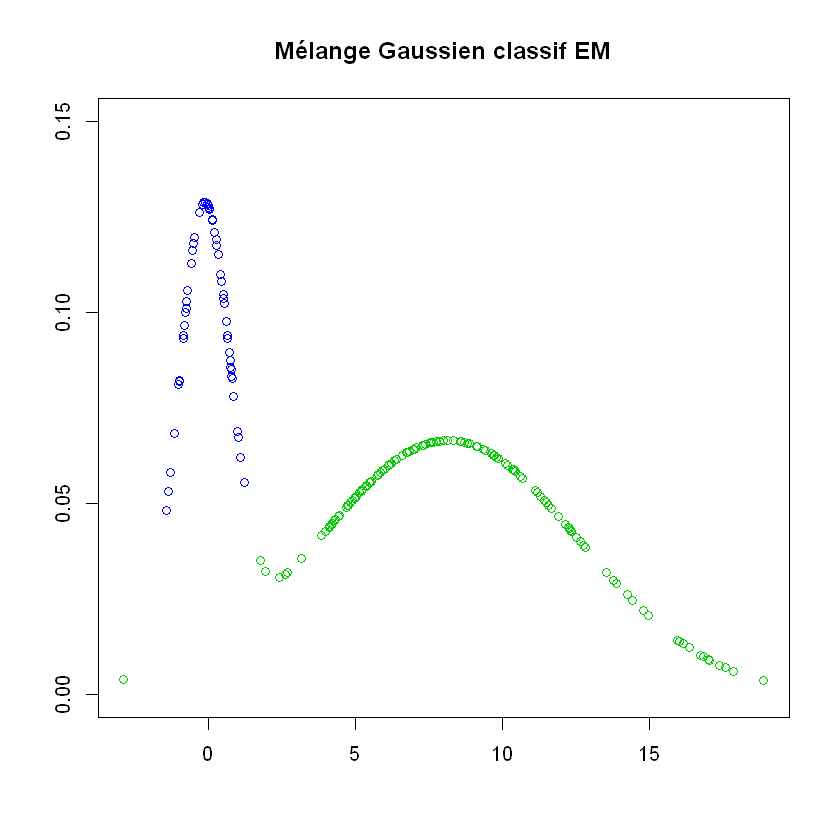

In [205]:


color_MAP2<-c()
simul<-c(loi_1,loi_2,loi_3)
for (i in 1:length(c(loi_1,loi_2,loi_3))){
  f1<-res$emv$pi[1]*dnorm(simul[i],res$emv$mu[1],res$emv$sig[1])/(res$emv$pi[1]*dnorm(simul[i],res$emv$mu[1],res$emv$sig[1])+res$emv$pi[2]*dnorm(simul[i],res$emv$mu[2],res$emv$sig[2])+res$emv$pi[3]*dnorm(simul[i],res$emv$mu[3],res$emv$sig[3]))
  f2<-res$emv$pi[2]*dnorm(simul[i],res$emv$mu[2],res$emv$sig[2])/(res$emv$pi[1]*dnorm(simul[i],res$emv$mu[1],res$emv$sig[1])+res$emv$pi[2]*dnorm(simul[i],res$emv$mu[2],res$emv$sig[2])+res$emv$pi[3]*dnorm(simul[i],res$emv$mu[3],res$emv$sig[3]))
  f3<-res$emv$pi[3]*dnorm(simul[i],res$emv$mu[3],res$emv$sig[3])/(res$emv$pi[1]*dnorm(simul[i],res$emv$mu[1],res$emv$sig[1])+res$emv$pi[2]*dnorm(simul[i],res$emv$mu[2],res$emv$sig[2])+res$emv$pi[3]*dnorm(simul[i],res$emv$mu[3],res$emv$sig[3]))
  
  if(f1>f2 && f1>f3){
    color_MAP2<-c(color_MAP2,2)
    
  }
  else if(f2>f1 && f2>f3){
    color_MAP2<-c(color_MAP2,3)
    
  }
  else{
    color_MAP2<-c(color_MAP2,4)
    
  }
}




plot(c(loi_1,loi_2,loi_3),res$emv$pi[1]*dnorm(c(loi_1,loi_2,loi_3),res$emv$mu[1],res$emv$sig[1])+res$emv$pi[2]*dnorm(c(loi_1,loi_2,loi_3),res$emv$mu[2],res$emv$sig[2])+res$emv$pi[3]*dnorm(c(loi_1,loi_2,loi_3),res$emv$mu[3],res$emv$sig[3]),ylim=c(0,0.15),col=color_MAP2,ylab = "",xlab="")
title("Mélange Gaussien classif EM")

Après avoir testé l'algorithme en changeant les données simulées et les paramètres d'initialisation remarque que si on prends des paramètres de départ proche des vrais paramètres, l'algorithme se debrouille plutôt bien. Les problèmes débutent si les paramètres initiaux sont trop loin des vrais, la fonction de log-vraisemblance n'étant pas concave, la convergence vers un maximun global n'est pas garantie, l'algorithme se retrouve donc bloqué dans un maximun local ou un point selle. Nous disctuterons des solutions possibles à ce problème, qui est le plus courant avec l'algorithme EM.

On reprend ces paramètres: 


In [214]:
theta_init1
theta_init3
theta_init4

$pi
[1] 0.8 0.1 0.1

$mu
[1]  0  5 10

$sig
[1] 1 1 4

$pi
[1] 0.3333333 0.1666667 0.5000000

$mu
[1]  0  5 10

$sig
[1] 10  3  7

$pi
[1] 0.3333333 0.3333333 0.3333333

$mu
[1]  0.2932875 18.0284394  0.5246945

$sig
[1] 8.1623744 9.9955390 0.2229278

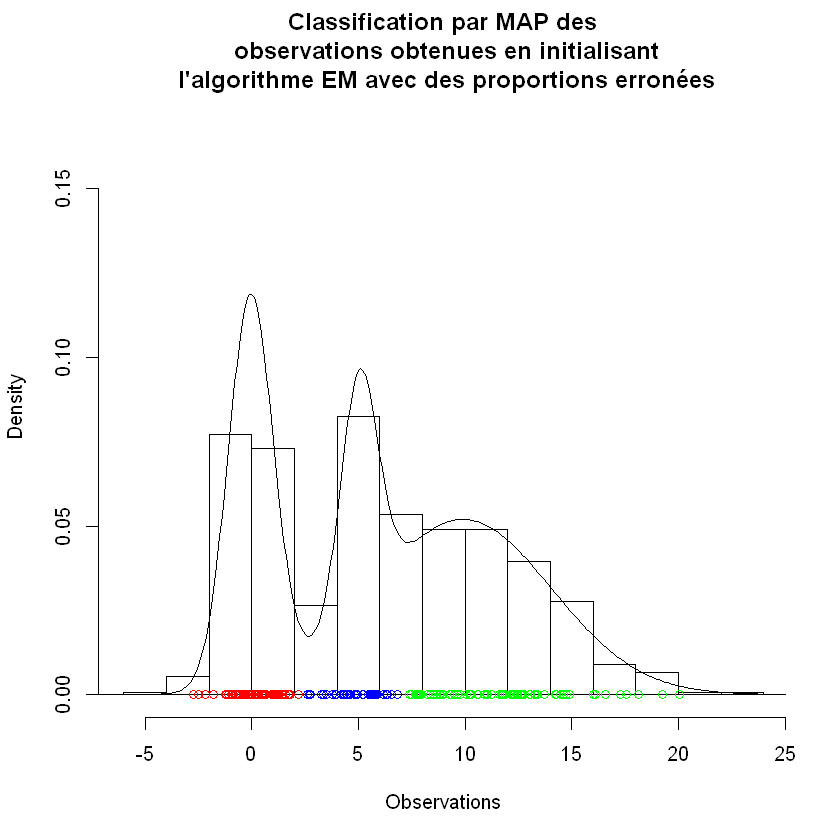

In [216]:
hist(obs$obs,breaks=20,prob=TRUE,xlab = "Observations",ylim = c(0,0.17), main="Classification par MAP des\n observations obtenues en initialisant\n l'algorithme EM avec des proportions erronées"  )
res<-algoEM(obs$obs,theta_init1, epsilon=1e-5)
lines(x,modele_melange(res$emv,x))
points(A$obs,rep(0,200),col=c('red','blue','green')[MAP(A$obs,theta=theta_init1)])

On a vus que si $\mu_{k}$  et  $\sigma_{k}$  sont correctement initialisés et que les valeurs $\pi_{k}$ sont erronées l'algorithme EM converge vers la bonne solution et donc la classification par la règle MAP  est quasiment la même que celle obtenue dans la partie 1.

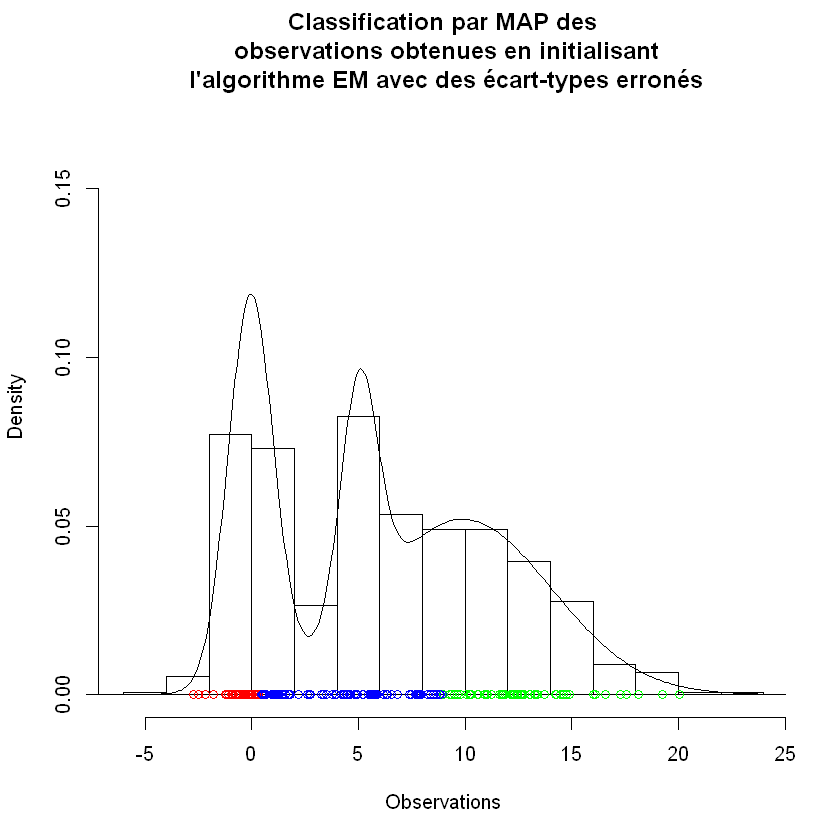

In [217]:
hist(obs$obs,breaks=20,prob=TRUE,xlab = "Observations",ylim = c(0,0.17), main="Classification par MAP des\n observations obtenues en initialisant\n l'algorithme EM avec des écart-types erronés"  )
res<-algoEM(obs$obs,theta_init3, epsilon=1e-5)
lines(x,modele_melange(res$emv,x))
points(A$obs,rep(0,200),col=c('red','blue','green')[MAP(A$obs,theta=theta_init3)])

On observe que si $\mu_{k}$  et  $\pi_{k}$  sont correctement initialisés et que les valeurs $\sigma_{k}$ sont erronées l'algorithme EM converge vers la bonne solution et donc la classification par la règle MAP est quasiment la même que celle obtenue dans la partie 1.

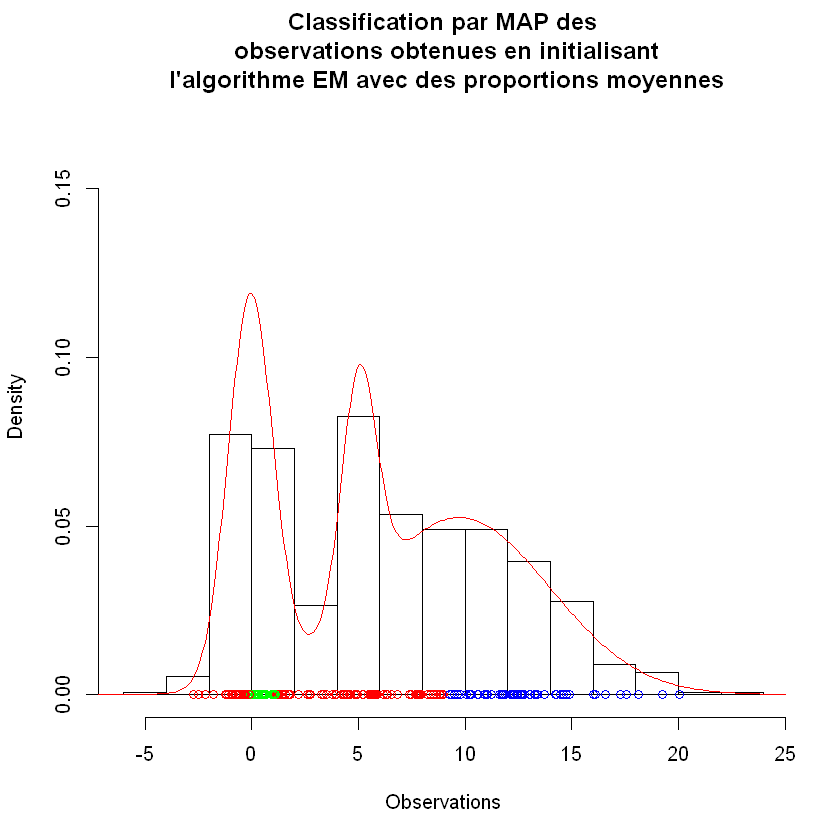

In [218]:
res_<-algoEM(obs$obs,theta_init4,epsilon=1e-6)
hist(obs$obs,breaks=20, prob = TRUE, xlab = "Observations",ylim = c(0,0.17),main="Classification par MAP des\n observations obtenues en initialisant\n l'algorithme EM avec des proportions moyennes" )
lines(x,modele_melange(res_$emv,x),type='l', col='red')
points(A$obs,rep(0,200),col=c('red','blue','green')[MAP(A$obs,theta=theta_init4)])

On observe que si $\sigma_{k}$  et  $\pi_{k}$  sont correctement initialisés et que les valeurs $\mu_{k}$ sont erronées l'algorithme EM ne semble pas converger et donc la classification obtenue par la règle MAP est différente de celle obtenue dans dans la partie 1. Ici, une classe devient quasiment inexistante.

**(e) Trouver un cas de croissance avec palier de la log-vraisemblance lors des itérations de EM**

Bien que facile à implémenter et efficace, l'algorithme EM présente quelques defauts. L'un des critères d'arrêt est défini en étudiant l'évoluation de la log-vraisemblance en fonction du nombre d'itérations mais comme on peut le voir si dessous, cette dernière peut rester presque constante pendant quelques itérations ( on parle de pallier) avant de recroitre, dans ce cas de figure l'algorithme se sera arreté trop tôt.

Ce phénomène traduit le principal problème de l'algorithme EM : les non-propriétés de convergences qui induisent que, en fonction de son point de départ, l'algorithme peut rester bloquer dans un optimun local. Pour pallier à cela, l’algorithme EM peut être initialisé par la position produisant la plus grande vraisemblance obtenue après le lancement aléatoire de courtes et nombreuses exécutions de EM lui-même.

On peut aussi utiliser des variantes à EM comme l'algorithme SEM, dont l'objectif est de réduire le risque de tomber dans un optimum local de vraisemblance.

Dans certains cas, l'etape de maximisation reste diffile, on peut alors utiliser l'algorithme GEM qui propose non plus une maximisation de Q mais une simple amélioration, qui est suffisante pour assurer la convergence vers un maximun local.

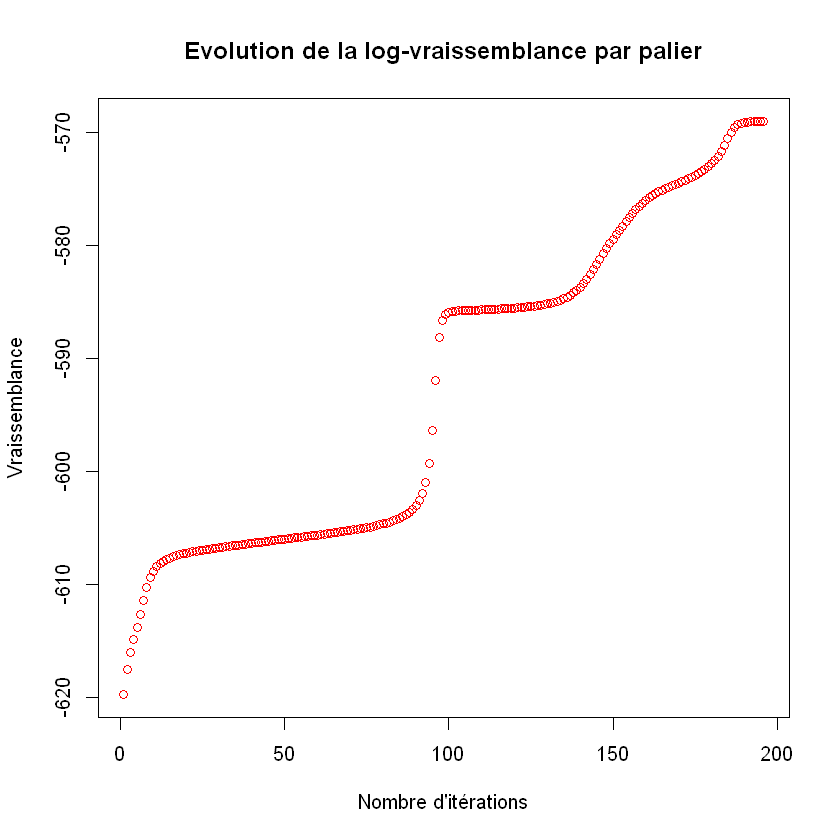

In [221]:
lvraisnorm <- function(param, obs){ 
  dens <- rep(0, length(obs))
  K <- length(param$pi)
  for (k in 1:K){
    dens <- dens + param$pi[k]*dnorm(obs,param$mu[k], param$sig[k])
  }                                         
  return(sum(log(dens)))
}

update_param<-function(obs,param){
  nb <- length(obs) 
  K  <- length(param$mu) 
  
  alpha <- matrix(NA, nrow=K, ncol=nb)
  for (j in 1:K){
    alpha[j,] <- param$pi[j]*dnorm(obs,param$mu[j],param$sig[j])
  }
  cx <- apply(alpha, 2, 'sum')
  alpha <- alpha/matrix(cx, byrow=TRUE, nrow=K, ncol=nb)
  

  pi_new  <- apply(alpha, 1, 'mean')
  mu_new  <- c(alpha%*%obs/nb/pi_new)
  mat     <- (matrix(rep(obs,each=K), nrow=K) -matrix(rep(mu_new, times=nb), nrow=K))^2
  sig_new <- sqrt(apply(alpha*mat, 1, 'mean')/pi_new)
  
  param_new <-  list(pi =pi_new, mu=mu_new, sig=sig_new)
  return(param_new)
}

algoEM <- function(obs,param,iterMax=200,epsilon=1e-5){   
  crit_arret<- FALSE
  param_old<-param
  param_new<-param
  logvrais_old<-lvraisnorm(param,obs)
  logvrais_new<-lvraisnorm(param,obs)
  iter<- 0
  vrai<-c()
  
  while (crit_arret==FALSE && (iter<iterMax)){ 
    param_new<-update_param(obs,param_old)
    logvrais_new<-lvraisnorm(param_new,obs)
    vrai<-c(vrai,logvrais_new)
    crit_arret <- (abs(( logvrais_new -  logvrais_old)/ logvrais_old)<epsilon)
    logvrais_old <- logvrais_new
    param_old <- param_new
    iter <- iter + 1
  }
  resultat <- list("emv" = param_new,"nb_iter"=iter,"vrai"=vrai)
  return(resultat)
}

param<-list(pi=c(0.05014786,0.10363385,0.84621829), mu=c(9.2502664,8.9100328,0.3349248),sig=c(5.396038,2.358926,6.927824))
res<-algoEM(simula,param)  

par(mfrow=c(1,1))
plot(seq(1,length(res$vrai)),res$vrai,col="red",ylab="Vraissemblance",xlab="Nombre d'itérations",main="Evolution de la log-vraissemblance par palier")

On a ici l'illustration d'un cas ou la log-vraisemblance croît par pallier, dans ce dernier l'algorithme EM pourrait très bien decider de s'arrêter au bout de 40 à 50 iterations.

## Algorithme EM, dimension quelconque (Mixmod)

**1. Il faut tout d’abord vous assurer que le package Rmixmod soit installé sur la machine sur laquelle vous travaillez.**

In [222]:
library(Rmixmod)

**2. Essayer Rmixmod sur des données simulées et comparer la densité du mélange estimé à la vraie densité de l’échantillon (graphiquement par exemple).**

On simule nos données: 

In [224]:
theta<-list(pi=c(1/3,1/6,1/2),mu=c(0,5,10),sig=c(1,1,4))
obs<-simul(1000,theta)

On utilise la librairie Rmixmod pour trouver le modèle de mélange le plus adapté aux données, et on le représente avec l'histogramme des données simulées. Puis on ajoute la densité de mélange qui a été utilisée pour simuler les données pour comparer/valider/vérifier les résultats de Rmixmod. 

In [225]:
mod=mixmodCluster(obs$obs,nbCluster=3)
summary(mod)

**************************************************************
* Number of samples    =  1000 
* Problem dimension    =  1 
**************************************************************
*       Number of cluster =  3 
*              Model Type =  Gaussian_pk_Lk_C 
*               Criterion =  BIC(5892.7742)
*              Parameters =  list by cluster
*                  Cluster  1 : 
                         Proportion =  0.3319 
                              Means =  0.0286 
                          Variances =  1.0429 
*                  Cluster  2 : 
                         Proportion =  0.1284 
                              Means =  4.8795 
                          Variances =  0.8035 
*                  Cluster  3 : 
                         Proportion =  0.5398 
                              Means =  9.7724 
                          Variances =  17.7797 
*          Log-likelihood =  -2918.7561 
**************************************************************


[1] 1


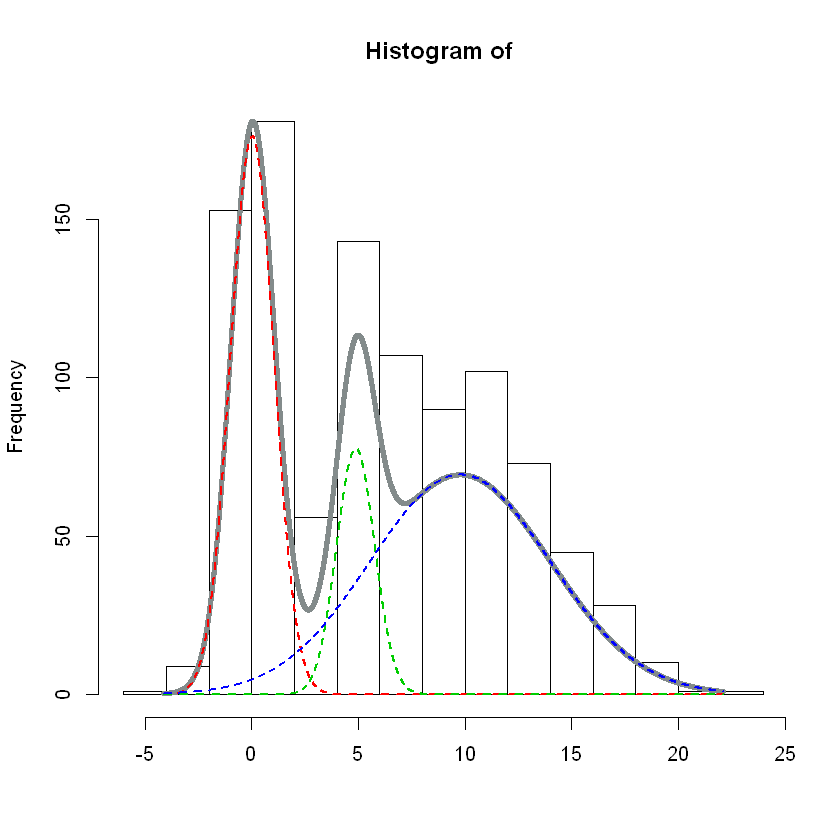

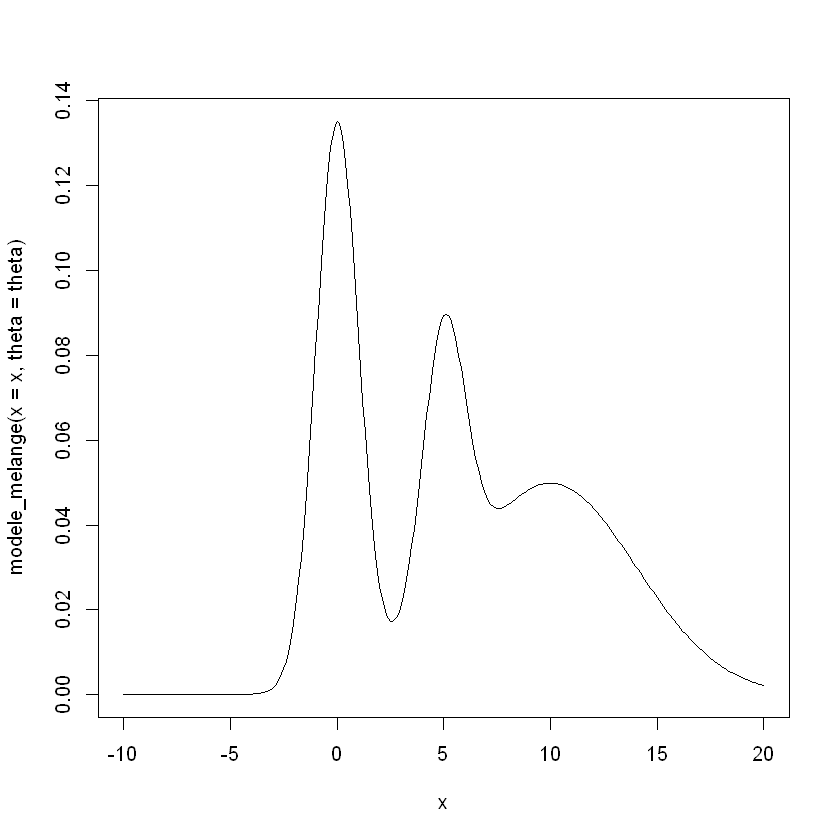

In [228]:
x=seq(min(theta$mu)-10,max(theta$mu)+10,0.1)
hist(mod)
plot(x,modele_melange(x=x,theta=theta),type='l')

Observations: on voit que Rmixmod donne de bons résultats. La densité ajustée par mixmodCluster est proche de la vraie densité qui a simulé les mélanges. 

L'objet mod est constitué de plusieurs éléments intéressants:

* Le modèle retenu et la valeur de sa log vraisemblance appliquée aux données

* Le critère pour justifier la notion de meilleure modèle: BIC par défaut

* Le modèle gaussien (reposant sur certaines hypothèses préalables) qui permet d'obtenir les meilleurs résultats 


In [229]:
mod[10]

[[1]]
* nbCluster   =  3 
* model name  =  Gaussian_pk_Lk_C 
* criterion   =  BIC(5892.7742)
* likelihood  =  -2918.7561 
****************************************
*** Cluster 1 
* proportion =  0.3319 
* means      =  0.0286 
* variances  =  1.0429 
*** Cluster 2 
* proportion =  0.1284 
* means      =  4.8795 
* variances  =  0.8035 
*** Cluster 3 
* proportion =  0.5398 
* means      =  9.7724 
* variances  =  17.7797 
****************************************


* La méthode pour trouver le modèle: algorithme, méthode d'initialisation, nombre d'itérations, ... 

In [230]:
mod[6]

****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number of iterations =  200 
* epsilon              =  0.001 
*** Initialization strategy:
* algorithm            =  smallEM 
* number of tries      =  10 
* number of iterations =  5 
* epsilon              =  0.001 
* seed                 =  NULL 
****************************************

* Le vecteur des données classées obtenues 

In [231]:
mod[12]

[1] 3 2 1 1 3 3 3 3 3 1 3 3 1 2 3 3 3 3 3 1 1 3 1 3 3 2 2 3 3 3 3 3 1 1 1 3 3
  [38] 1 1 3 2 2 1 2 3 3 2 1 2 1 3 3 2 3 2 2 2 3 3 2 3 1 3 2 1 3 3 1 3 3 3 3 3 1
  [75] 3 3 1 3 2 1 2 3 1 3 1 3 3 2 2 3 3 1 1 2 3 1 3 1 3 1 1 2 3 1 1 2 1 1 1 3 1
 [112] 1 1 1 2 3 3 1 3 1 3 3 1 1 1 3 1 1 2 2 3 3 2 2 1 3 2 2 3 1 1 3 3 3 3 3 2 3
 [149] 3 1 3 3 3 2 3 1 3 3 2 1 3 1 3 3 1 2 1 3 1 2 3 2 1 1 3 3 1 3 2 3 1 1 2 2 3
 [186] 1 3 2 3 2 3 1 3 3 3 3 3 1 3 1 3 2 3 1 3 1 1 3 3 2 1 3 3 3 1 1 1 1 3 3 1 2
 [223] 3 3 1 3 3 1 1 3 1 1 1 2 1 1 3 3 2 2 3 1 1 3 1 3 3 1 3 3 1 1 3 1 3 3 1 1 3
 [260] 1 1 3 2 1 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 1 2 1 1 1 3 1
 [297] 1 2 3 3 3 1 2 1 1 3 3 3 2 3 3 1 1 2 3 3 1 1 1 2 2 3 1 1 3 3 2 3 3 3 3 3 1
 [334] 3 3 2 1 3 3 3 2 3 3 2 3 3 1 3 2 1 1 1 3 1 3 3 3 3 1 3 2 1 1 3 2 1 1 2 1 3
 [371] 3 3 3 1 3 1 1 2 1 3 3 1 2 1 3 1 3 1 2 1 3 3 1 3 3 3 2 1 3 1 2 1 2 3 3 1 3
 [408] 2 3 3 1 3 1 3 3 3 3 1 1 2 2 2 1 2 3 1 1 3 3 1 1 1 3 3 1 3 3 3 3 3 1 1 3 1
 [445] 1 2 1 3 1 3 2 2 3 3 3 3 2 2 3 3 1 3 1 3 1 3 3 1 2 1 3 3 1 1 3 3 3 3 1 1 3
 [482] 3 1 2 1 3 3 2 1 1 3 1 3 2 3 1 3 2 1 3 3 2 3 3 1 3 3 1 3 1 3 1 3 1 3 3 3 2
 [519] 3 2 3 3 2 3 1 1 3 3 2 1 3 1 1 3 1 2 3 1 3 1 1 2 1 3 2 3 3 3 3 3 3 3 2 3 3
 [556] 2 1 3 3 3 3 3 2 3 1 1 2 2 1 3 1 1 3 3 1 2 1 1 2 1 1 1 2 3 3 3 3 3 3 3 1 3
 [593] 1 1 1 1 3 3 3 3 2 1 3 3 2 2 3 2 3 3 3 1 3 2 1 2 3 1 3 3 3 2 3 1 1 3 1 3 1
 [630] 1 1 3 2 1 2 2 3 3 1 3 3 2 1 3 1 1 2 1 2 3 3 1 1 1 2 3 2 3 1 3 1 3 1 2 1 3
 [667] 1 1 1 2 3 1 3 1 3 3 2 1 3 1 3 2 1 3 1 1 2 3 3 2 3 2 3 3 3 3 3 2 1 1 2 3 1
 [704] 1 1 3 1 3 3 3 3 3 3 3 1 3 1 3 2 3 2 3 3 3 1 3 3 1 1 3 3 2 3 1 3 1 3 1 1 1
 [741] 3 1 1 1 3 3 1 3 2 3 1 1 3 3 1 3 2 1 2 1 1 1 3 3 2 3 2 3 3 3 3 3 1 3 3 3 2
 [778] 3 2 3 3 1 1 1 3 2 1 3 1 3 3 2 1 1 1 2 3 3 3 3 2 3 1 3 3 1 3 3 3 3 1 3 3 3
 [815] 2 1 1 3 1 3 1 3 3 3 2 3 3 1 1 1 3 3 2 1 3 3 3 1 1 3 1 2 2 3 1 1 3 2 2 2 1
 [852] 3 3 1 3 1 2 3 3 3 3 3 1 3 1 1 3 1 1 1 3 3 1 2 3 1 2 3 2 1 1 3 1 3 1 1 1 3
 [889] 2 3 3 1 1 1 3 3 3 1 3 1 1 1 1 3 3 3 3 3 3 3 3 2 1 1 3 3 1 1 3 1 3 1 3 3 1
 [926] 1 1 3 1 2 1 1 3 3 1 3 2 3 2 1 2 2 3 1 1 3 2 1 2 3 3 3 3 3 1 2 1 3 3 3 1 3
 [963] 3 3 3 1 1 3 3 3 1 1 3 3 3 1 3 3 1 3 2 2 1 2 2 2 1 3 1 3 1 3 3 1 3 1 3 1 1
[1000] 2

**3. Jouer avec les arguments d’entrée de Rmixmod, et notamment nbCluster et models.**

On test Rmixmod avec nbCluster =3 et model = Gaussian_p_L_Bk ou Gaussian_pk_Lk_C.

In [232]:
par(mfrow=c(1,2))
mod<-mixmodCluster(obs$obs,nbCluster=3, model = mixmodGaussianModel(listModels = c("Gaussian_pk_Lk_C")))
summary(mod)
mod<-mixmodCluster(obs$obs,nbCluster=3, model = mixmodGaussianModel(listModels = c("Gaussian_p_L_Bk")))
summary(mod)

**************************************************************
* Number of samples    =  1000 
* Problem dimension    =  1 
**************************************************************
*       Number of cluster =  3 
*              Model Type =  Gaussian_pk_Lk_C 
*               Criterion =  BIC(5892.7752)
*              Parameters =  list by cluster
*                  Cluster  1 : 
                         Proportion =  0.1285 
                              Means =  4.8797 
                          Variances =  0.8042 
*                  Cluster  2 : 
                         Proportion =  0.5396 
                              Means =  9.7739 
                          Variances =  17.7731 
*                  Cluster  3 : 
                         Proportion =  0.3319 
                              Means =  0.0286 
                          Variances =  1.0431 
*          Log-likelihood =  -2918.7566 
**************************************************************
******************

Pour un nbCluster = 3 le modèle Gaussian_p_L_Bk a un BIC plus élevé que pour le modèle Gaussian_pk_Lk_C. Donc le modèle Gaussian_pk_Lk_C semble coller mieux à nos données.
Ceci est confirmé si on regarde plus précisément les hypothèses de ce second modèle: proportions variables et volumes variables entre les classes notamment, ce qui est le cas de nos données. Si on applique le premier sur nos données, on fait des hypothèses qui ne semblent pas convenir à nos données, par exemple des proportions égales. 

On test Rmixmod avec un nbCluster = 6.

In [233]:
mod<-mixmodCluster(obs$obs,nbCluster=6)
summary(mod)

**************************************************************
* Number of samples    =  1000 
* Problem dimension    =  1 
**************************************************************
*       Number of cluster =  6 
*              Model Type =  Gaussian_pk_Lk_C 
*               Criterion =  BIC(5952.4731)
*              Parameters =  list by cluster
*                  Cluster  1 : 
                         Proportion =  0.0899 
                              Means =  7.4728 
                          Variances =  21.7580 
*                  Cluster  2 : 
                         Proportion =  0.1393 
                              Means =  9.8639 
                          Variances =  7.8126 
*                  Cluster  3 : 
                         Proportion =  0.1502 
                              Means =  4.8298 
                          Variances =  0.8933 
*                  Cluster  4 : 
                         Proportion =  0.1152 
                              Means =  7.9

Pour le modèle Gaussian_pk_Lk_C un nbCluster = 6 le BIC est plus élevé que pour 3 on aurait tendance à choisir un nombre de clusters égale à 3.

**4. Que fait Rmixmod lorsque vous donnez en argument d’entrée nbCluster = 2 : 8 ?**

In [234]:
mod<-mixmodCluster(obs$obs,nbCluster=2:8)
summary(mod)

**************************************************************
* Number of samples    =  1000 
* Problem dimension    =  1 
**************************************************************
*       Number of cluster =  3 
*              Model Type =  Gaussian_pk_Lk_C 
*               Criterion =  BIC(5892.7756)
*              Parameters =  list by cluster
*                  Cluster  1 : 
                         Proportion =  0.1285 
                              Means =  4.8797 
                          Variances =  0.8045 
*                  Cluster  2 : 
                         Proportion =  0.5396 
                              Means =  9.7745 
                          Variances =  17.7707 
*                  Cluster  3 : 
                         Proportion =  0.3319 
                              Means =  0.0286 
                          Variances =  1.0432 
*          Log-likelihood =  -2918.7568 
**************************************************************


Le meilleur choix du nombre de classes selon le critère BIC est 3 comme le montre le graphique. C'est en faite un peu ce que fait mixmodCluster avec l'argument nbCluster=2:8. 

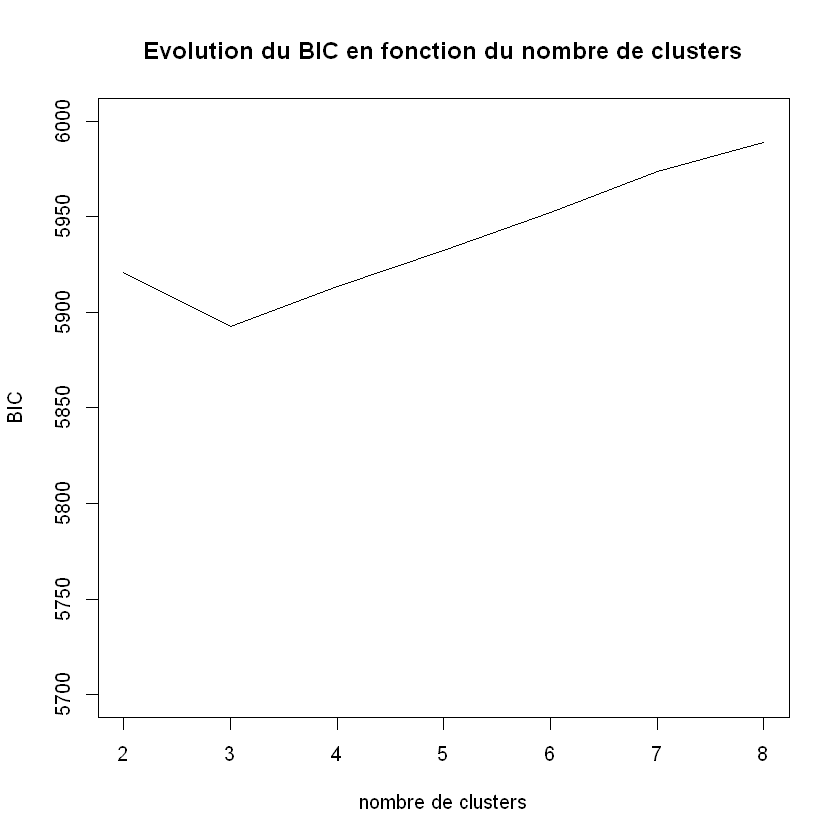

In [235]:
BIC<-list()
for (i in 2:8){
mod10<-mixmodCluster(obs$obs,nbCluster=i)
BIC<-c(BIC,mod10[16])
}
plot(2:8,BIC,xlab = "nombre de clusters" , ylim=c(5700,6000),type='l',main="Evolution du BIC en fonction du nombre de clusters")

En effet, lorsque l'on donne en argument d’entrée nbCluster = 2:8, il calcule le meilleur modèle obtenu pour chacun des nombres de clusters de 2 à 8 et nous ressort le nbCluster associé au modèle qui a le plus petit BIC.

**5. Nous nous intéressons maintenant au choix du nombre de classes.**

**(a) Pour un mélange unidimensionnel de deux composantes gaussiennes de
variance 1 dans des proportions égales, à quelles conditions BIC sélectionnet-il le vrai nombre de composantes ? De même pour ICL. Vous répondrez par une étude numérique basée sur des simulations bien choisies.**


Avant d'implémenter l'algorithme, on a besoin de définir par exemple le nombre composante de notre modèle, il est cependant fréquent que la structure de modélisation d’ou sont issues les données soit incertaine. Pour nous aider dans notre decision, introdusions 2 critères : BIC et ICL\

**L'indice BIC  et ICL**

**BIC = Critère d'information bayésien**
Le critère BIC s'écrit $$BIC=-2ln(L)+kln(N)$$ avec L la vraisemblance du modèle estimée,N le nombre d'observations dans l'échantillon et k le nombre de paramètres libres du modèle.
Choisir un modèle avec ce critère revient à choisir le modele qui le minimise.
 
**ICL = Vraisemblance complètée intégrée**
 
Le  critère ICL s'écrit $$ICL = BIC - E(K) $$ oû E(K) est l'entropie du modèle de mélange. 
 
Le critère ICL pénalise le critère BIC avec l'entropie calculée à partir de l'affectation des données au modèle dans le mélange, i.e. un mélange dont les données sont bien séparées a une entropie faible et est ainsi favorisé, ICL pénalisera les modèles produisant des classes trop imbriquées, ce que ne faisait pas BIC.
 
D'après les hypothèse de la question ici les paramètres sont les deux moyennes des composantes gaussiennes
D'apres les différences des criteres et les hypotheses on peut supposer que BIC est meilleur quand les moyennes sont plus proches et ICL quand elles sont eloignées.

**Pour BIC:**

* Choisissons un petit échantillon pour voir si le BIC arrive à détecter le bon nombre de classes :

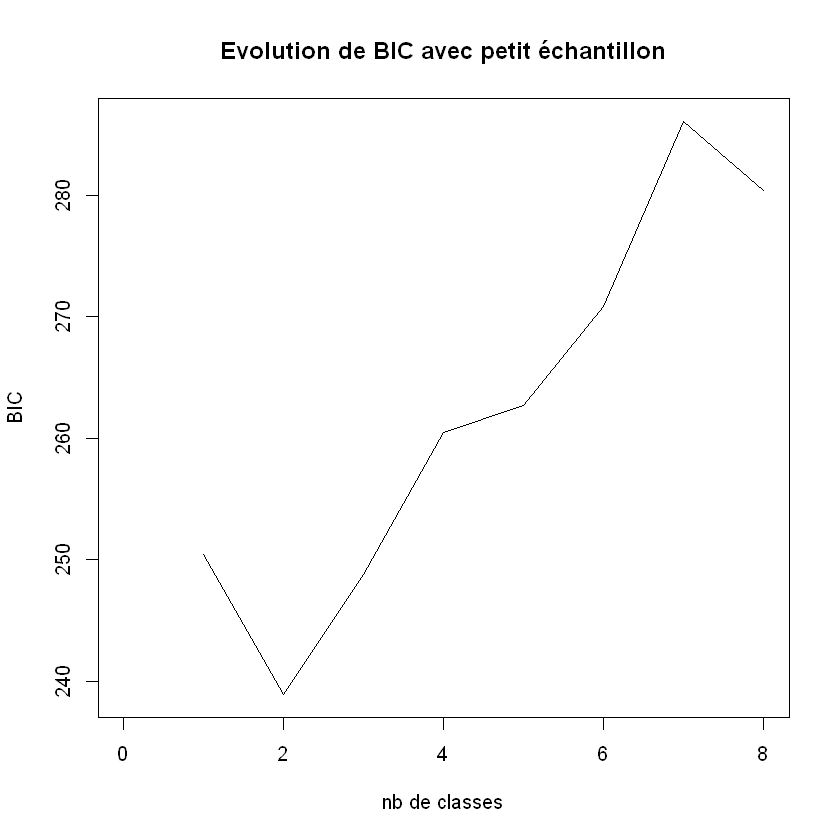

In [236]:
theta_5<-list(pi=c(1/2,1/2),mu=c(0,5),sig=c(1,1))
obs_5<-simul(n=50,theta=theta_5)
BIC<-list()
for (i in 1:8){
  mod10<-mixmodCluster(obs_5$obs,nbCluster=i)
  BIC<-c(BIC,mod10[16])
}
plot(1:8,BIC,type='l',xlab="nb de classes",ylab="BIC",xlim=c(0,8),main="Evolution de BIC avec petit échantillon")

Pour de petits échantillons, le BIC peut faire une erreur. L'échantillon manque d'information. 

* Choisissons des espérances proches 

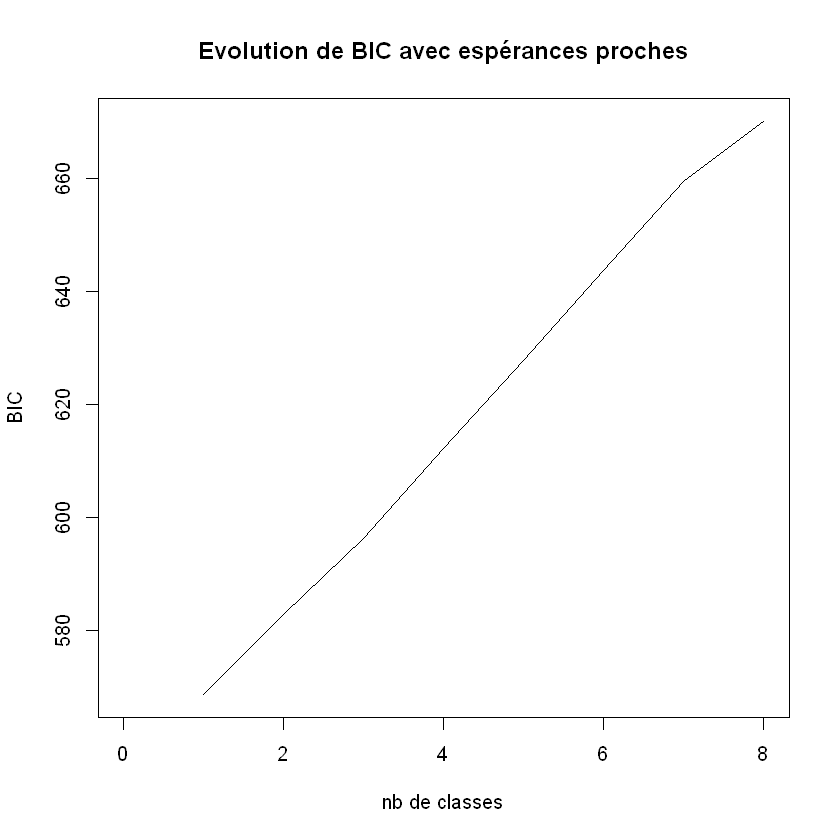

In [237]:
theta_5<-list(pi=c(1/2,1/2),mu=c(0,0.3),sig=c(1,1))
obs_5<-simul(n=200,theta=theta_5)
BIC<-list()
for (i in 1:8){
  mod10<-mixmodCluster(obs_5$obs,nbCluster=i)
  BIC<-c(BIC,mod10[16])
}
plot(1:8,BIC,type='l',xlab="nb de classes",ylab="BIC",xlim=c(0,8),main="Evolution de BIC avec espérances proches")

Ici, le BIC se trompe aussi: il ne propose pas la différenciation en 2 classes. 


* Choisissons des espérances éloignées: 


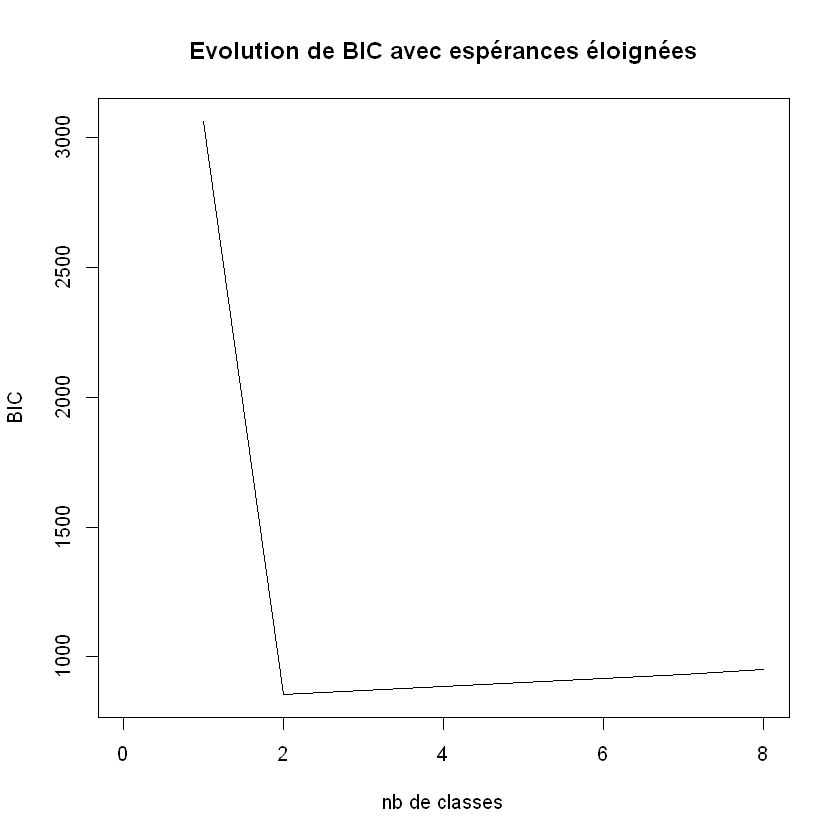

In [238]:
theta_5<-list(pi=c(1/2,1/2),mu=c(0,1000),sig=c(1,1))
obs_5<-simul(n=200,theta=theta_5)
BIC<-list()
for (i in 1:8){
  mod10<-mixmodCluster(obs_5$obs,nbCluster=i)
  BIC<-c(BIC,mod10[16])
}
plot(1:8,BIC,type='l',xlab="nb de classes",ylab="BIC",xlim=c(0,8),main="Evolution de BIC avec espérances éloignées")

Le critère BIC propose bien de faire 2 classes, mais les modèles avec plus de classes ne donnent pas des BIC beaucoup plus élevés que celui à 2 classes.


Il faudrait que les moyennes ne soient pas ni trop éloignées, ni trop proches et que le nombre d'observations soit suffisant. Sauf cas extrême, c'est plutôt bon. 

**Pour ICL**

Les mêmes cas pour ICL:

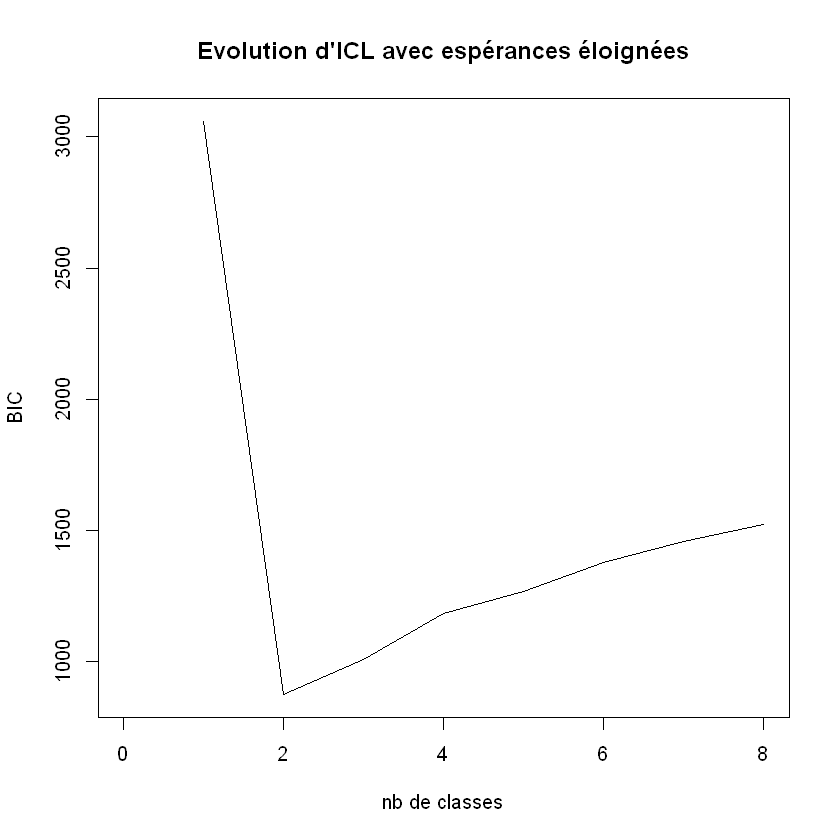

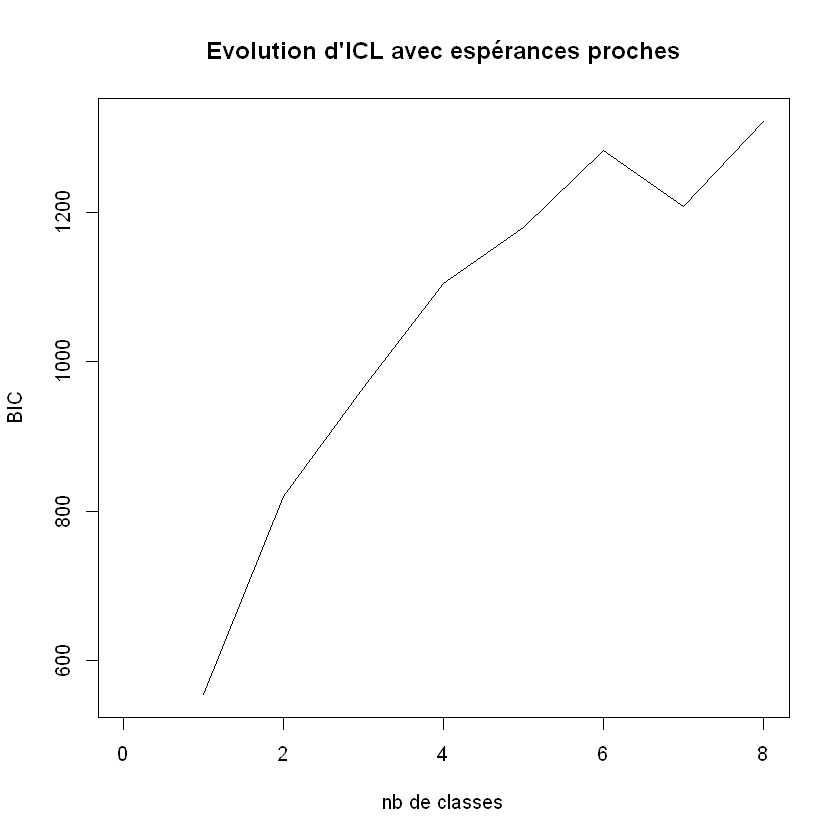

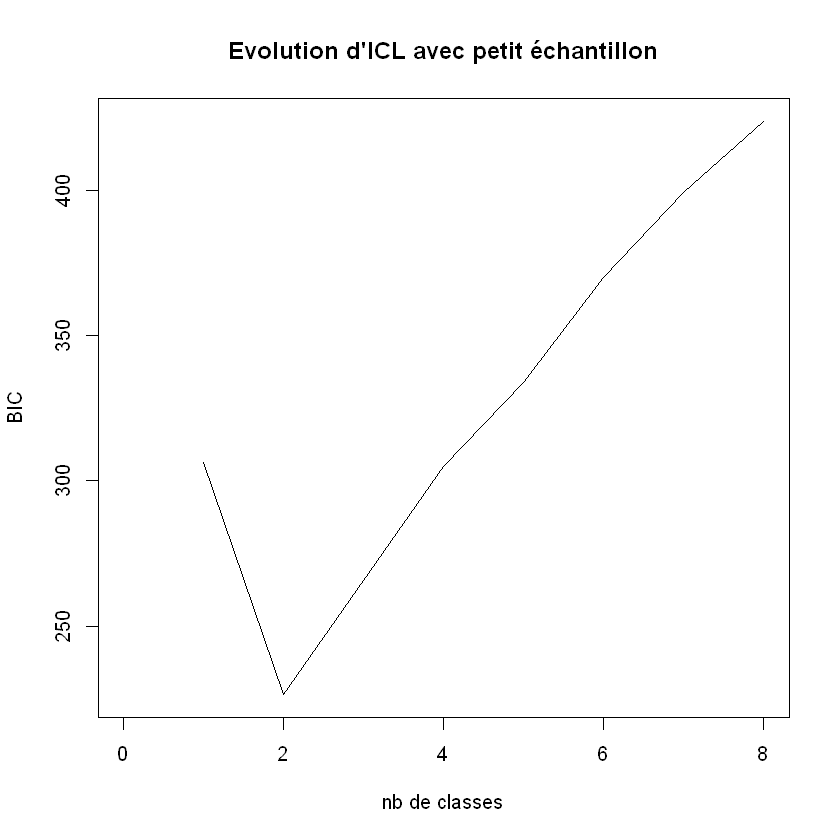

In [239]:
theta_5<-list(pi=c(1/2,1/2),mu=c(0,1000),sig=c(1,1))
obs_5<-simul(n=200,theta=theta_5)
ICL<-list()
for (i in 1:8){
  mod10<-mixmodCluster(obs_5$obs,nbCluster=i,criterion='ICL')
  ICL<-c(ICL,mod10[16])
}
plot(1:8,ICL,type='l',xlab="nb de classes",ylab="BIC",xlim=c(0,8),main="Evolution d'ICL avec espérances éloignées")

theta_5<-list(pi=c(1/2,1/2),mu=c(0,0.3),sig=c(1,1))
obs_5<-simul(n=200,theta=theta_5)
ICL<-list()
for (i in 1:8){
  mod10<-mixmodCluster(obs_5$obs,nbCluster=i,criterion='ICL')
  ICL<-c(ICL,mod10[16])
}
plot(1:8,ICL,type='l',xlab="nb de classes",ylab="BIC",xlim=c(0,8),main="Evolution d'ICL avec espérances proches")

theta_5<-list(pi=c(1/2,1/2),mu=c(0,10),sig=c(1,1))
obs_5<-simul(n=50,theta=theta_5)
ICL<-list()
for (i in 1:8){
  mod10<-mixmodCluster(obs_5$obs,nbCluster=i,criterion='ICL')
  ICL<-c(ICL,mod10[16])
}
plot(1:8,ICL,type='l',xlab="nb de classes",ylab="BIC",xlim=c(0,8),main="Evolution d'ICL avec petit échantillon")

Le critère ICL semble être moins sensible aux espérances éloignées et à une plus petite taille d'échantillon ou du moins semble plus pénaliser les modèles avec un grand nombre de classes. 
En effet, son calcul montre qu'il est plus réticent aux modèles avec plus de classes: ce critère pénalise plus vite.


**(b) On s’intéresse maintenant à des données multidimensionnelles, par exemple les données seeds. Utiliser Rmixmod pour sélectionner le nombre de classes et la forme du modèle par BIC d’une part ; par ICL d’autre part. Visualiser les résultats obtenus.**

On importe les données :

In [241]:
seeds_dataset <- read.table("seeds_dataset.txt") 

De la même manière que lorsqu'on laisse à la fonction le choix du nombre de classes, si on lui laisse le choix du modèle (avec l'option full pour tous les proposer ou en proposant plusieurs disponibles dans la fonction mixmodGaussianModel()), l'algorithme nous renvoie le paramètre le plus performant associé à un certain modèle. 

Ce qu'on fait ici: on parcourt le nombre de classes: pour chaque nombre, l'algorithme choisit les clusters les plus performants grâce au BIC. A la fin, on trace le BIC en fonction du nombre de classes et on affiche le modèle le plus performant pour chaque nombre de classes. Par exemple, le critère BIC nous propose de faire 4 classes avec le modèle Gaussian p_L_Dk_A_Dk. On peut remarquer que les modèles à 3,5 et 6 classes ont des BIC pas loin de celui à 4 classes. 

**Pour BIC**

[[1]]
[1] "Gaussian_p_Lk_C"

[[2]]
[1] "Gaussian_p_Lk_Dk_A_Dk"

[[3]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[4]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[5]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[6]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[7]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[8]]
[1] "Gaussian_p_L_Dk_A_Dk"



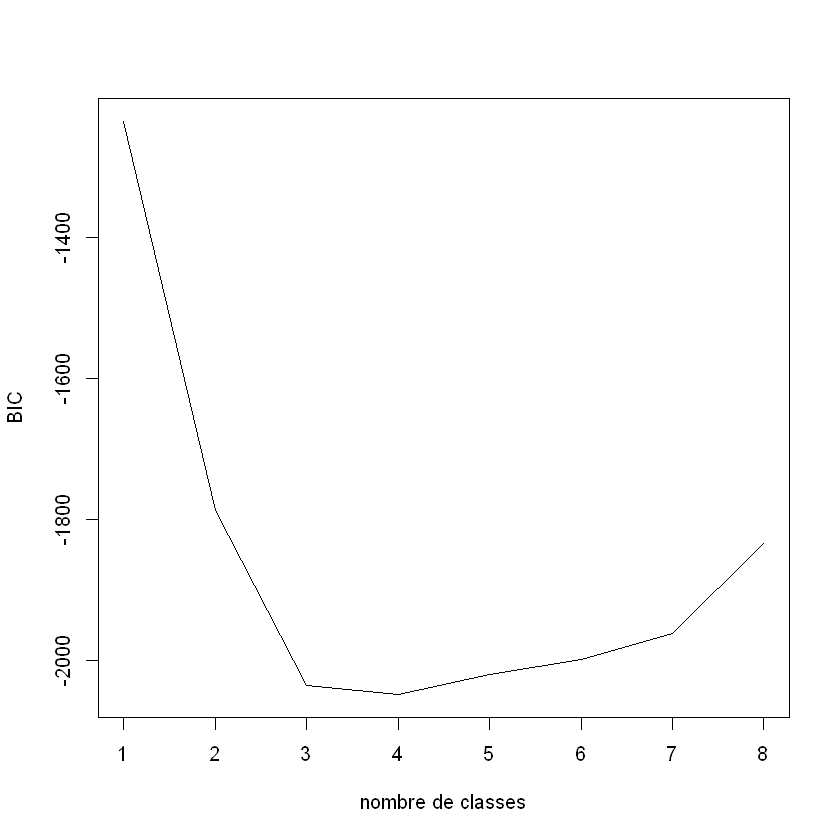

In [242]:
BIC<-list()
models<-list()
for (i in 1:8){
  mod10<-mixmodCluster(seeds_dataset[,-8],nbCluster=i,criterion='BIC',models=mixmodGaussianModel(family="all"))
  BIC<-c(BIC,mod10[16])
  models<-c(models,mod10[15])
}
plot(1:8,BIC,type='l',xlab="nombre de classes")
print(models)

**Pour ICL**

On fait la même chose et on obtient un modèle de mélange à 3,4 ou 5 classes (valeurs d'ICL très proches) avec le modèle Gaussian p_L_Dk_A_Dk.


[[1]]
[1] "Gaussian_p_Lk_C"

[[2]]
[1] "Gaussian_pk_Lk_Ck"

[[3]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[4]]
[1] "Gaussian_pk_L_Dk_A_Dk"

[[5]]
[1] "Gaussian_p_Lk_Ck"

[[6]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[7]]
[1] "Gaussian_p_L_Dk_A_Dk"

[[8]]
[1] "Gaussian_p_L_Dk_A_Dk"



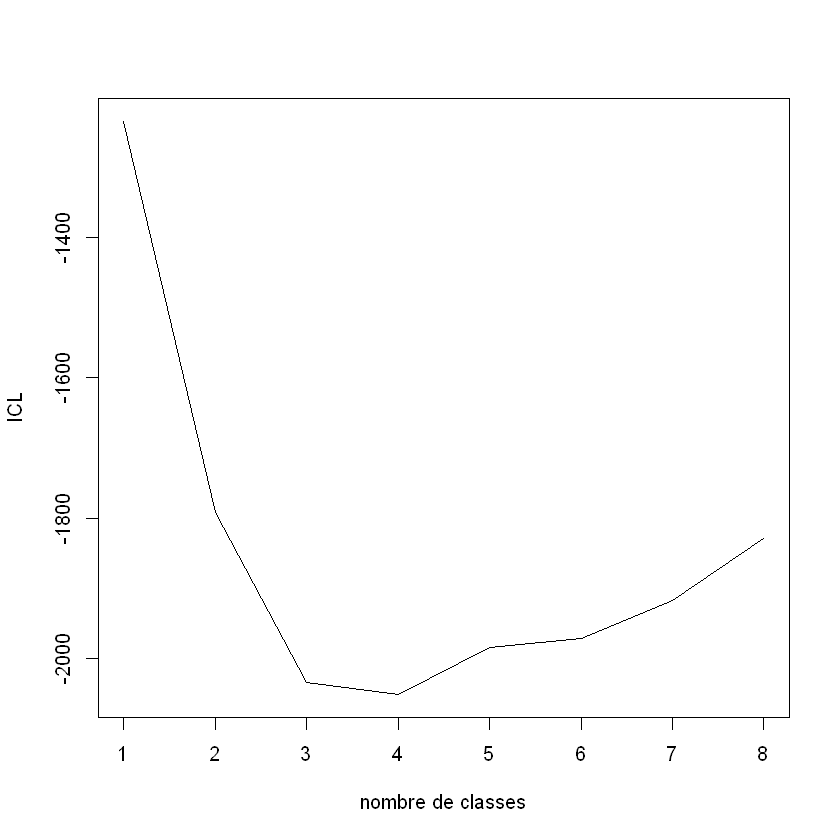

In [243]:
ICL<-list()
models<-list()
for (i in 1:8){
  mod10<-mixmodCluster(seeds_dataset[,-8],nbCluster=i,criterion='ICL',models=mixmodGaussianModel(family="all"))
  ICL<-c(ICL,mod10[16])
  models<-c(models,mod10[15])
}
plot(1:8,ICL,type='l',xlab="nombre de classes")
print(models)

Ce qu'on peut retenir, c'est que la prise de décision sur le nombre de classes peut être délicate, surtout quand les indicateurs ne nous donnent pas de décision claire et tranchée. Ici, nous savons que le vrai nombre de variétés de graines dans le dataset est 3. 3 fait effectivement partie des meilleurs candidats pour le BIC et l'ICL mais n'est pas forcément le meilleur. 

En ce qui concerne le meilleur modèle, les 2 critères nous donnent le même : p_L_Dk_A_Dk. Ce modèle semble donc adapté aux données seeds: il correspond notamment à des hypothèses du type proportions, volumes, et formes des classes égales. 


**(c) Même question mais en sélectionnant uniquement le nombre de classes, la forme de modèle étant fixée (par exemple, pour la forme [pkLI] d’une part ; pour la forme [pkLkC] d’autre part).**

Pour le modèle pkLI fixé : on choisit le nombre de classes à l'aide des critères BIC et ICL: 

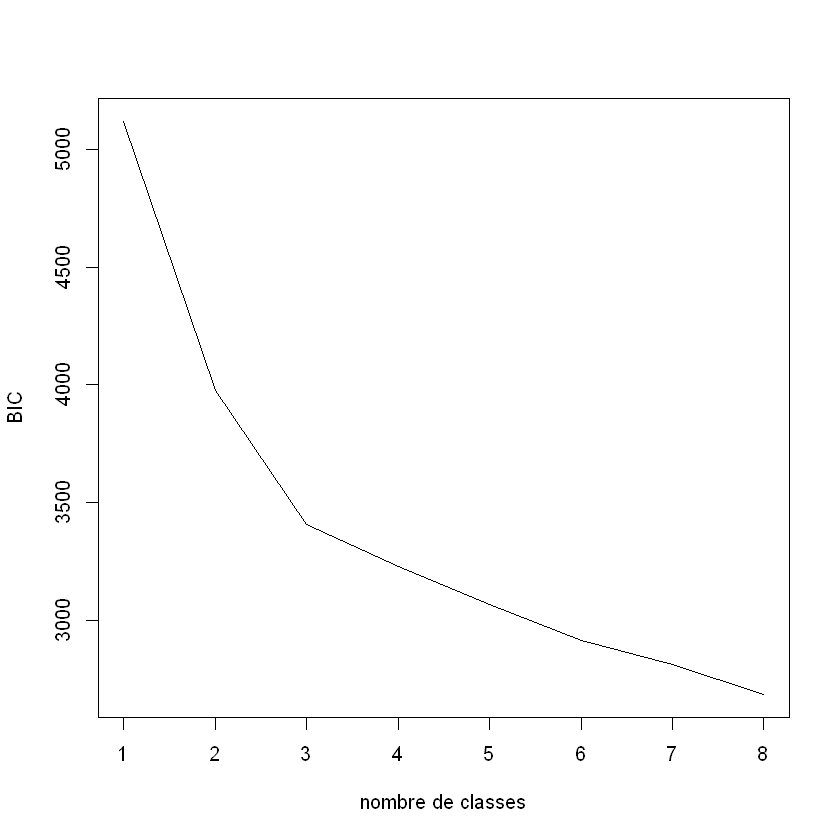

In [244]:
BIC<-list()

for (i in 1:8){
  mod10<-mixmodCluster(seeds_dataset[,-8],nbCluster=i,criterion='BIC',models=mixmodGaussianModel(listModels = c("Gaussian_pk_L_I")))
  BIC<-c(BIC,mod10[16])
}
plot(1:8,BIC,type='l',xlab="nombre de classes")

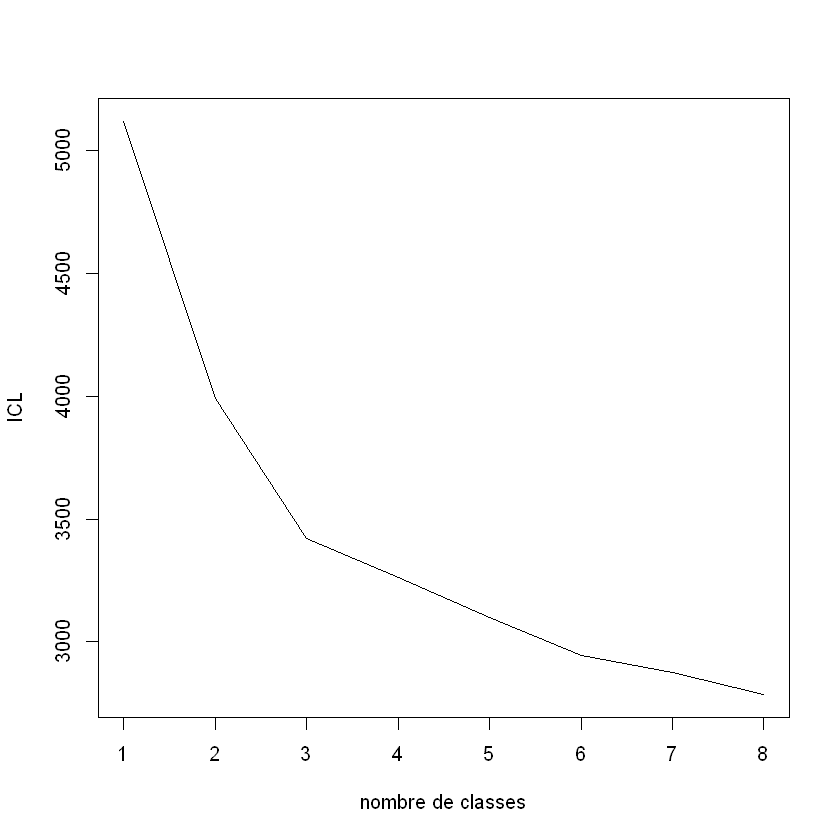

In [245]:
ICL<-list()
for (i in 1:8){
  mod10<-mixmodCluster(seeds_dataset[,-8],nbCluster=i,criterion='ICL',models=mixmodGaussianModel(listModels = c("Gaussian_pk_L_I")))
  ICL<-c(ICL,mod10[16])
}
plot(1:8,ICL,type='l',xlab="nombre de classes")

Les critères nous proposent au moins 8 classes, puisqu'on a pas testé plus grand. 

Pour le modèle pkLkC fixé: 

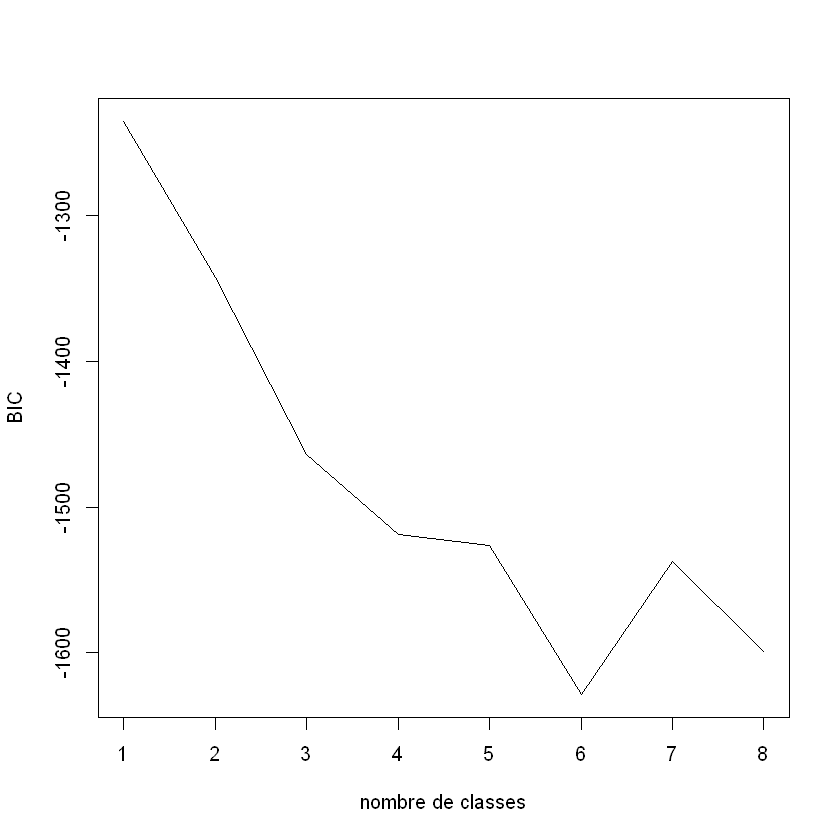

In [246]:
BIC<-list()

for (i in 1:8){
  mod10<-mixmodCluster(seeds_dataset[,-8],nbCluster=i,criterion='BIC',models=mixmodGaussianModel(listModels = c("Gaussian_pk_Lk_C")))
  BIC<-c(BIC,mod10[16])
}
plot(1:8,BIC,type='l',xlab="nombre de classes")

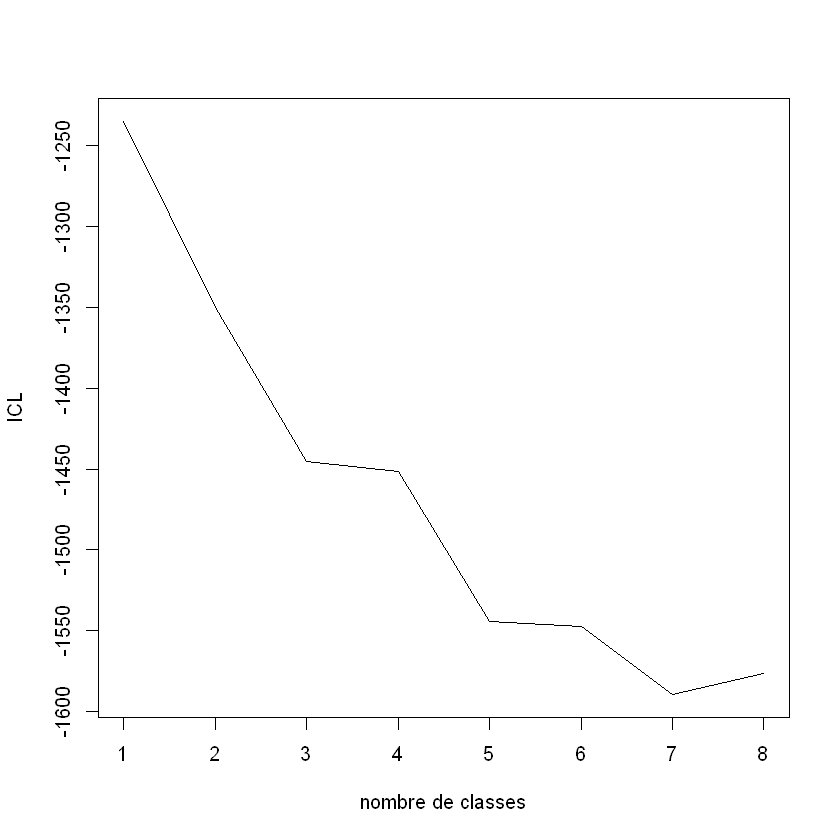

In [247]:
ICL<-list()
for (i in 1:8){
  mod10<-mixmodCluster(seeds_dataset[,-8],nbCluster=i,criterion='ICL',models=mixmodGaussianModel(listModels = c("Gaussian_pk_Lk_C")))
  ICL<-c(ICL,mod10[16])
}
plot(1:8,ICL,type='l',xlab="nombre de classes")

Ici, les critères nous proposent 6 ou 7 classes. 


Les modèles ne sont pas adaptés aux données. Ie, les hypothèses faites au préalable pour pouvoir supposer ces modèles sont fausses dans le cadre des données. 
C'est la raison pour laquelle le nombre de classes proposées dépasse largement ce qu'on s'attendait à avoir. Ceci illustre bien l'importance du choix du modèle.